### Context
As the world’s population has expanded and gotten richer, the demand for food, energy and water has seen a rapid increase. Not only has demand for all three increased, but they are also strongly interlinked: food production requires water and energy; traditional energy production demands water resources; agriculture provides a potential energy source. This article focuses on the environmental impacts of food. Ensuring everyone in the world has access to a nutritious diet in a sustainable way is one of the greatest challenges we face.

#### Content
This dataset contains most 43 most common foods grown across the globe and 23 columns as their respective land, water usage and carbon footprints.

##### Columns

    Land use change - Kg CO2 - equivalents per kg product
    Animal Feed - Kg CO2 - equivalents per kg product
    Farm - Kg CO2 - equivalents per kg product
    Processing - Kg CO2 - equivalents per kg product
    Transport - Kg CO2 - equivalents per kg product
    Packaging - Kg CO2 - equivalents per kg product
    Retail - Kg CO2 - equivalents per kg product
These represent greenhouse gas emissions per kg of food product(Kg CO2 - equivalents per kg product) across different stages in the lifecycle of food production.

Eutrophication – the pollution of water bodies and ecosystems with excess nutrients – is a major environmental problem. The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor.

Acknowledgements
https://ourworldindata.org

Inspiration
Which types of food have more negative impact on the environment?
What types of food production should be encouraged to consume nutritious diet in a sustainable way?
Which stage of food production contributes more to the greenhouse gas emmision?
Compare carbon footprint of plant-based foods?
Compare carbon footprint of animal-based foods?
Compare carbon footprint of protein rich foods?

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
import scipy.stats as stats
sns.set(style='white')
import warnings
warnings.filterwarnings('ignore')

In [55]:
food = pd.read_csv('food_production.csv')
food.tail()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
38,Milk,0.5,0.2,1.5,0.1,0.1,0.1,0.3,2.8,17.750000,10.65,32.272727,1047.000000,1903.636364,628.2,5.250000,9.500000,14.916667,8.95,27.121212,19786.3,59958.48485,32977.16667
39,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,25.418605,98.37,44.551630,1448.372093,2538.586957,5605.2,6.170543,10.815217,22.684755,87.79,39.759964,180850.6,81906.97464,46731.42119
40,Eggs,0.7,2.2,1.3,0.0,0.1,0.2,0.0,4.5,15.111111,21.76,19.610671,401.180556,520.638068,577.7,3.243056,4.208724,4.354167,6.27,5.650685,17982.7,16206.47080,12487.98611
41,Fish (farmed),0.5,0.8,3.6,0.0,0.1,0.1,0.0,5.1,131.351955,235.12,103.100197,2062.178771,1618.636264,3691.3,7.614525,5.976759,4.698324,8.41,3.687788,41572.2,18229.42337,23224.69274
42,Shrimps (farmed),0.2,2.5,8.4,0.0,0.2,0.3,0.2,11.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
food.shape

(43, 23)

In [57]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [58]:
food.describe()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,27.000000,30.000000,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,52.771953,504.188977,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,52.033823,539.130695,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,17.855335,106.927557,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,37.333333,338.059413,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,55.297183,694.805356,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [59]:
food.isnull().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [60]:
#replace the NAN values to zero because the food products are different so it is impossible to estimate a value for the missing data
food = food.fillna(0)

In [61]:
food.describe()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,20.860257,40.776047,33.135878,351.759752,869.473451,824.162791,4.323724,8.492383,9.534057,25.861628,18.275259,32350.751163,35793.195374,12125.982843
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,42.173510,79.151355,48.396627,505.559316,1320.512015,1254.370907,9.572196,16.655345,25.308187,74.279031,41.323921,54701.845169,75308.427005,15721.359204
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,0.957716,2.350000,0.000000,0.000000,0.000000,43.750000,0.176578,0.000000,0.397562,0.730000,0.000000,943.800000,0.000000,0.000000
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,4.754098,10.650000,11.726883,114.015837,284.000000,369.800000,0.911681,2.705882,1.997738,2.420000,3.943662,10593.700000,8185.854503,3762.568306
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,17.296663,36.165000,46.375941,550.140858,1191.055487,833.950000,4.196842,9.527778,4.460075,12.590000,17.222222,31340.350000,44916.778855,21650.819220
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [62]:
food['Food product'].unique().tolist()

['Wheat & Rye (Bread)',
 'Maize (Meal)',
 'Barley (Beer)',
 'Oatmeal',
 'Rice',
 'Potatoes',
 'Cassava',
 'Cane Sugar',
 'Beet Sugar',
 'Other Pulses',
 'Peas',
 'Nuts',
 'Groundnuts',
 'Soymilk',
 'Tofu',
 'Soybean Oil',
 'Palm Oil',
 'Sunflower Oil',
 'Rapeseed Oil',
 'Olive Oil',
 'Tomatoes',
 'Onions & Leeks',
 'Root Vegetables',
 'Brassicas',
 'Other Vegetables',
 'Citrus Fruit',
 'Bananas',
 'Apples',
 'Berries & Grapes',
 'Wine',
 'Other Fruit',
 'Coffee',
 'Dark Chocolate',
 'Beef (beef herd)',
 'Beef (dairy herd)',
 'Lamb & Mutton',
 'Pig Meat',
 'Poultry Meat',
 'Milk',
 'Cheese',
 'Eggs',
 'Fish (farmed)',
 'Shrimps (farmed)']

### Distribution of Numeric Columns

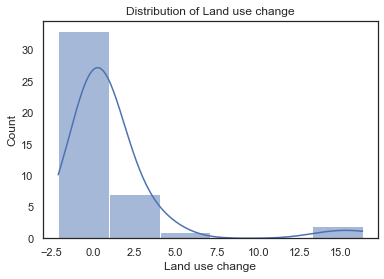

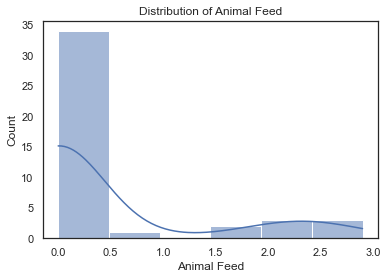

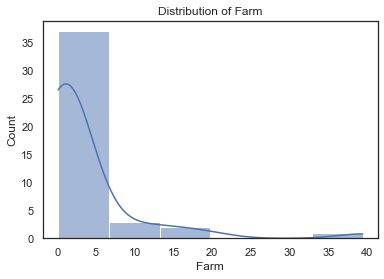

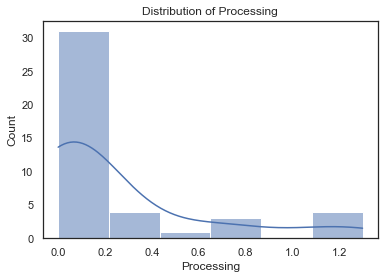

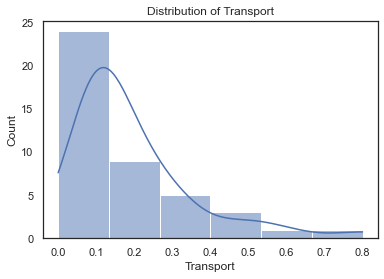

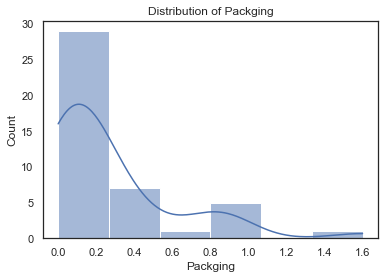

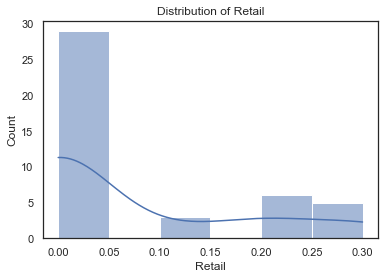

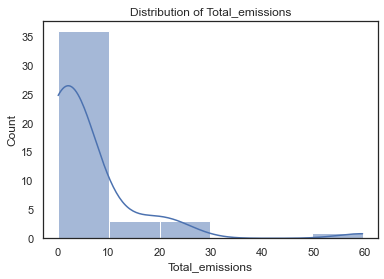

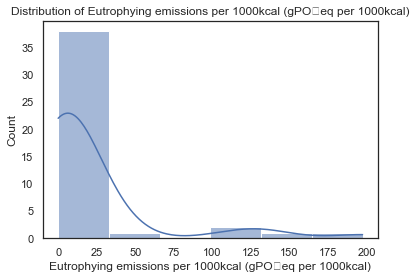

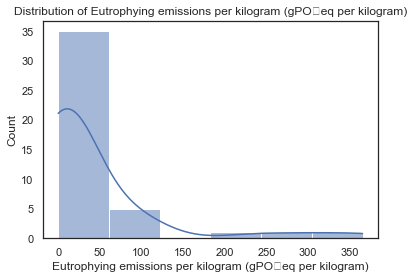

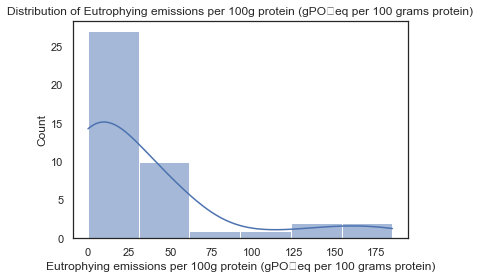

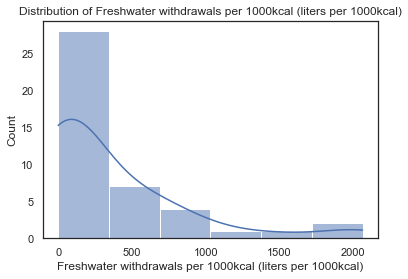

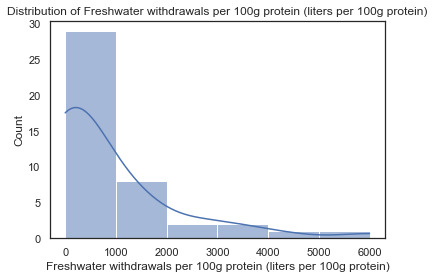

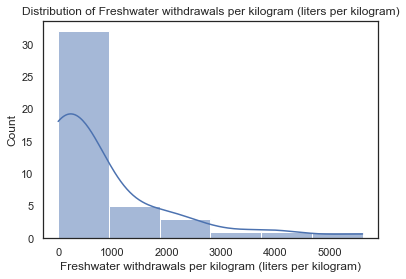

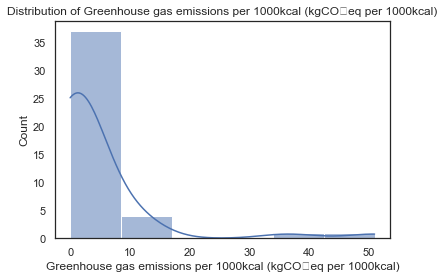

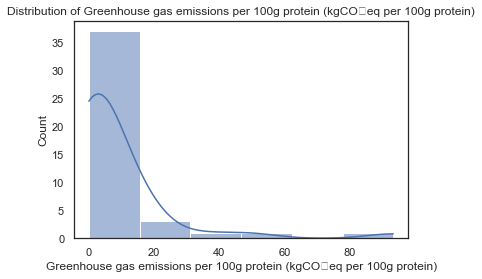

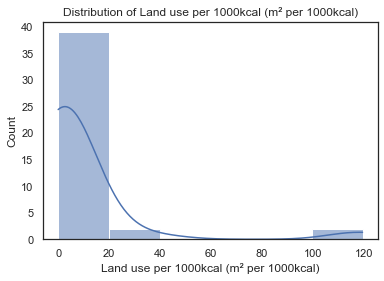

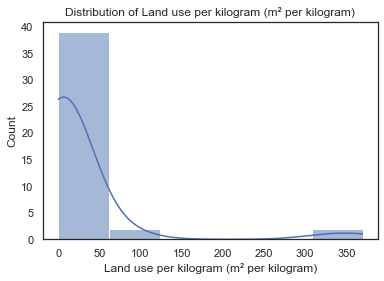

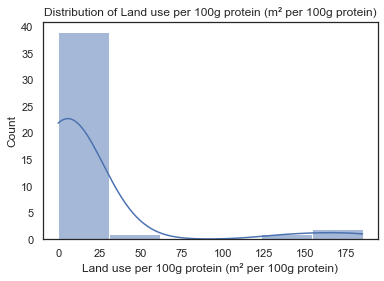

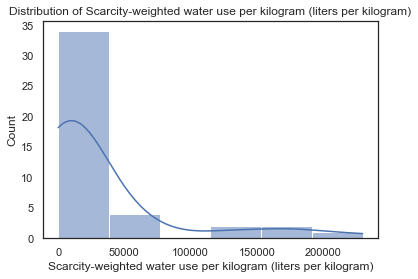

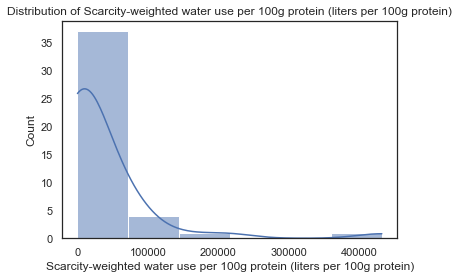

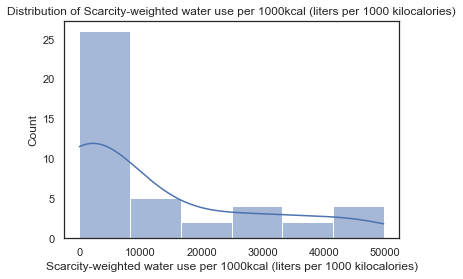

In [63]:
for col in food.columns:
    if food[col].dtypes == 'float':
        sns.histplot(x=col, data = food, bins=6, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
        

In [64]:
food.columns.values

array(['Food product', 'Land use change', 'Animal Feed', 'Farm',
       'Processing', 'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

#### Total Emissions Of Food Production Cycle
This represents GreenHouse Gases (GHG) per kilogram of food product during the overall food production cycle.The greenhouses gases are measured in kilograms CO2-equivalents per kilogram of a food product. Total emisson encompass GHG from the various steps of the production cycle. There are 7 steps in the production cylce. Land use change, Animal Feed, Farm, Processing, Transport, Packaging and Retail. 
From the bar plot below, beef(both heard and diary), lamb and cheese are the 4 top emittters of more 20kg C02 equivalents per kilogram of food product. Aniaml-based foods mostly tend to have higher carbon footprints compared to plant-based foods. Herd beef emits 60kg CO2 equivalents of greenhouse gases  compared to 1kg of maize per kilogram of respective products. This shows a massive difference between greenhouse gases of the different foods in the plot. It worth noting that, the least GHG emissions are plant-based foods that is, root vegetables, potatoes, apples, onions & leeks and nuts.

Farm is the biggest contributor of GHG across the various food products (shown in green).Herd beef and dark chocolate (from cocoa) have the top two biggest land use change GHG emissions (shown in blue) while nuts has a negative land use change emission.

In [65]:
food.groupby(['Food product'])[['Total_emissions']].sum().sort_values('Total_emissions', ascending =False)

,Total_emissions
Food product,
Beef (beef herd),59.6
Lamb & Mutton,24.5
Cheese,21.2
Beef (dairy herd),21.1
Dark Chocolate,18.7
Coffee,16.5
Shrimps (farmed),11.8
Palm Oil,7.6
Pig Meat,7.2


In [66]:
# subset the food and their major GHG emission in the production cycle
t = food[['Food product', 'Land use change', 'Animal Feed', 'Farm',
       'Processing', 'Transport', 'Packging', 'Retail', 'Total_emissions']].set_index('Food product')\
        .sort_values('Total_emissions')
t = t.drop('Total_emissions', axis=1)


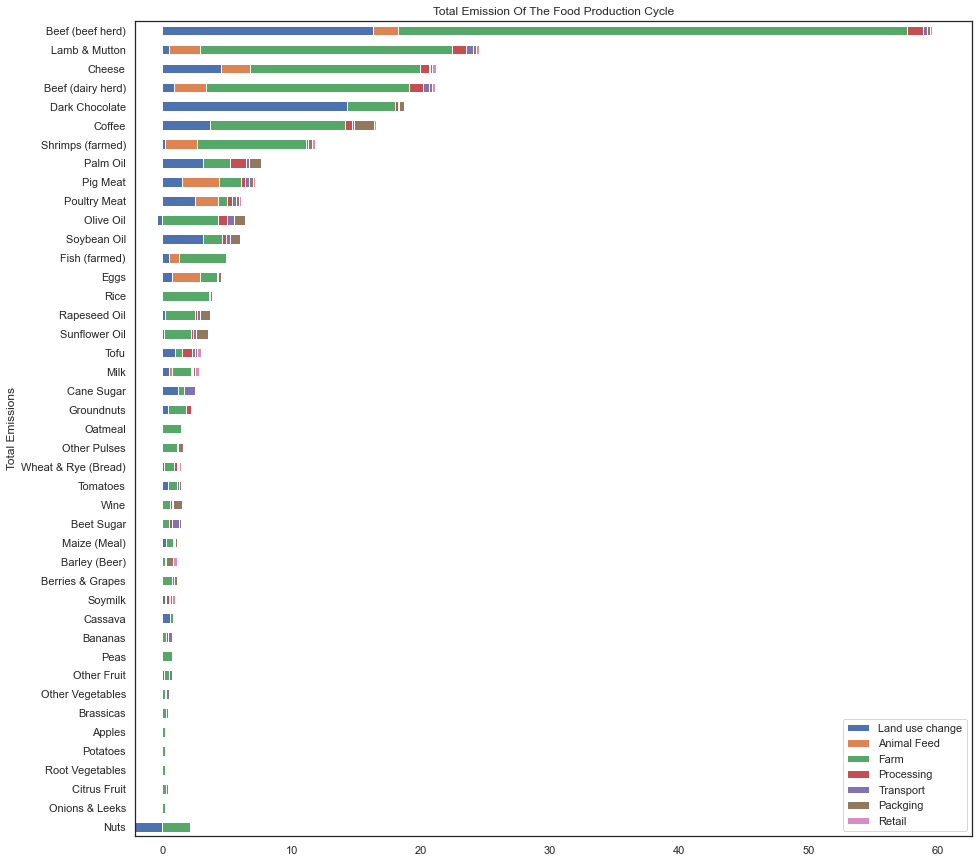

In [67]:
#plot the total emission of the food production cycle.
fig,ax = plt.subplots(figsize=(15,15))
t.plot(kind='barh',stacked=True, ax=ax)
plt.ylabel('Total Emissions')
plt.title('Total Emission Of The Food Production Cycle')
plt.show()

### Percentage of Greenhouse gas emission in relation to total emission
For every kilogram of food produced, farm contributes to 58% of total greenhouse emission , followed by land use of 21%, Animal farm by 8%,packaging by 5% processing by 4%, Transport by 3% and Retail by 1%.

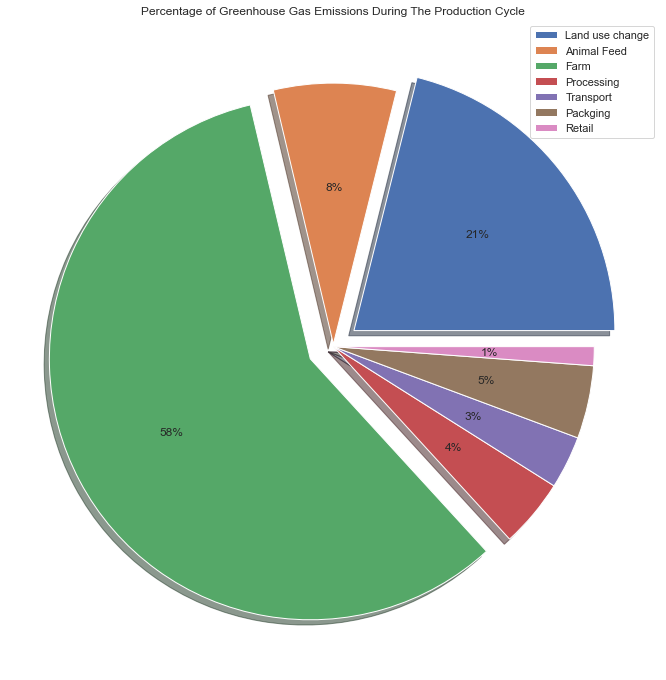

In [68]:
plt.figure(figsize=(12,12))
percent= food.iloc[:, 1:8].sum()
plt.pie(percent, autopct = "%0.0f%%",explode = [0.1,0.01,0.1,0,0,0,0],shadow=True)
plt.legend(labels =percent.index,loc='upper right')
plt.title("Percentage of Greenhouse Gas Emissions During The Production Cycle")
plt.show()

### Greenhouse Gas Emissions During The Various Stages Of Food Production
Changes in the concentration of certain greenhouse gases, from human activity such food production, increase the risk of global climate change. https://www.canr.msu.edu/news/greenhouse_gases_their_impact_on_climate_change
A closer look at the emisions from the 7 production of cycle.The Process is categorized in 7 stages. Land Use Change,Animal Feed, Farm, Processing, Tranport, Packaging and Retail. The visualization of detailed impacts of the various stages of food products on the climate.

##### Land Use Change Greenhouse Gas Emission of Food Products
Land use change is a process by which human activities transform the natural landscape, referring to how land has been used, usually emphasizing the functional role of land for economic activities.Activities clearing forest for farm lands (defforestation).`From: Climatic Hazards in Coastal Bangladesh, 2017`
Beef herd and dark chocolate are the top emiters of over 14kg GHG per kilogram while production of nuts,wine, citrus fruits and olive oil rank below 0 kg emission CO2 equivalents.

In [69]:
emission= food[~(food['Land use change'] == 0)][['Food product','Total_emissions']]

In [70]:
def food_emission(column,color):
    """This function requires a column name od stage of production emission and color for the bar graph, filter outs 
    food products with zero emissions, calculates the total percentage of different stages in the lifecycle of food production 
    in relation to total emission and plots the emission per food product.
    Args:
        column name as a string, color name as a string
    Returns:
        A bar graph of food product per emission and first five rows of emission a new dataframe with product name,
        
    """
    emission= food[~(food[column] == 0)][['Food product',column]].sort_values(column,ascending=False)
    emission = emission[['Food product',column]]
    
    plt.figure(figsize=(12,12))
    sns.barplot(y='Food product',x=column,data=emission,color=color)
    plt.title(f'GreenHouse Gas Emission of {column} Per Food Product of Production Cycle')
    plt.show()
    
    return emission


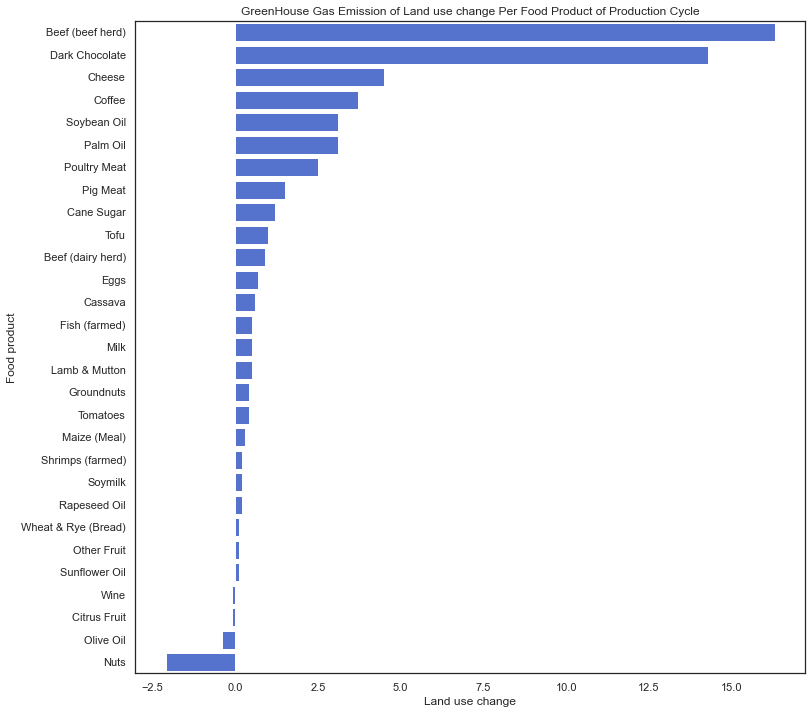

,Food product,Land use change
33,Beef (beef herd),16.3
32,Dark Chocolate,14.3
39,Cheese,4.5
31,Coffee,3.7
15,Soybean Oil,3.1


In [71]:
land_use_change = food_emission('Land use change','royalblue')
land_use_change.head()

##### Animal Feed Greenhouse Gas Emission of Food Products
Animal feed is on-farm crop production and its processing into feed for livestock.It can be noticed that the emissions are from animal-based products with 3kg or less CO2 equivalents per kilogram produced. 

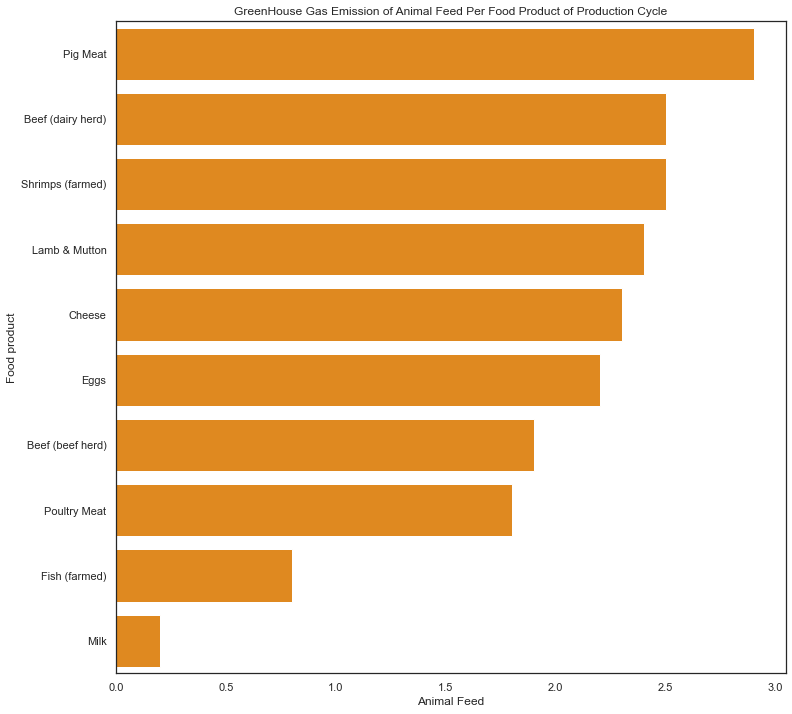

,Food product,Animal Feed
36,Pig Meat,2.9
34,Beef (dairy herd),2.5
42,Shrimps (farmed),2.5
35,Lamb & Mutton,2.4
39,Cheese,2.3
40,Eggs,2.2
33,Beef (beef herd),1.9
37,Poultry Meat,1.8
41,Fish (farmed),0.8
38,Milk,0.2


In [72]:
animal_feed = food_emission('Animal Feed','darkorange')
animal_feed

##### Farm Greenhouse Gas Emission of Food Products
Farm emissions include all farm activities that contribute to greenhouse gases. Processes such as increase in fertiliser,both organic and synthetic, use for crops dramatically increases emissions. The production of methane in the stomachs of ruminants is also a major contributer to GHG emissions of the farm.  From the graph beef herd, lamb & mutton and dairy beef recorded 15kg of CO2 equivalents of GHG per a kilogram produced. Most of the food products have less than 5kg CO2 equivalents of GHG emissions.


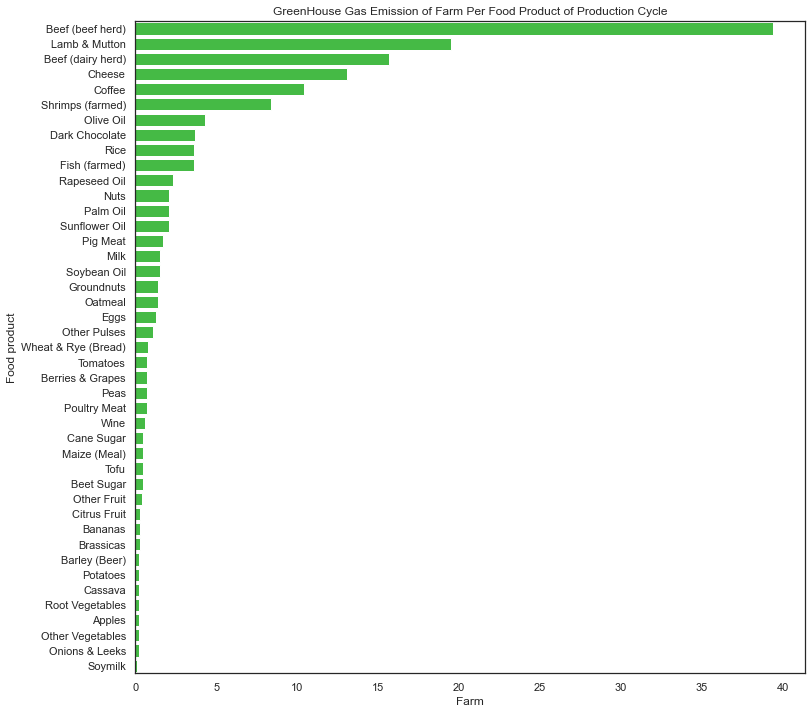

,Food product,Farm
33,Beef (beef herd),39.4
35,Lamb & Mutton,19.5
34,Beef (dairy herd),15.7
39,Cheese,13.1
31,Coffee,10.4


In [73]:
farm = food_emission('Farm','limeGreen')
farm.head()

##### Processing
Emission from energy used in the processs of converting raw agricultural products into finished goods. herd beef and Palm oil are the top emitters of GHG of 1.3kg of CO2 equivalents. 

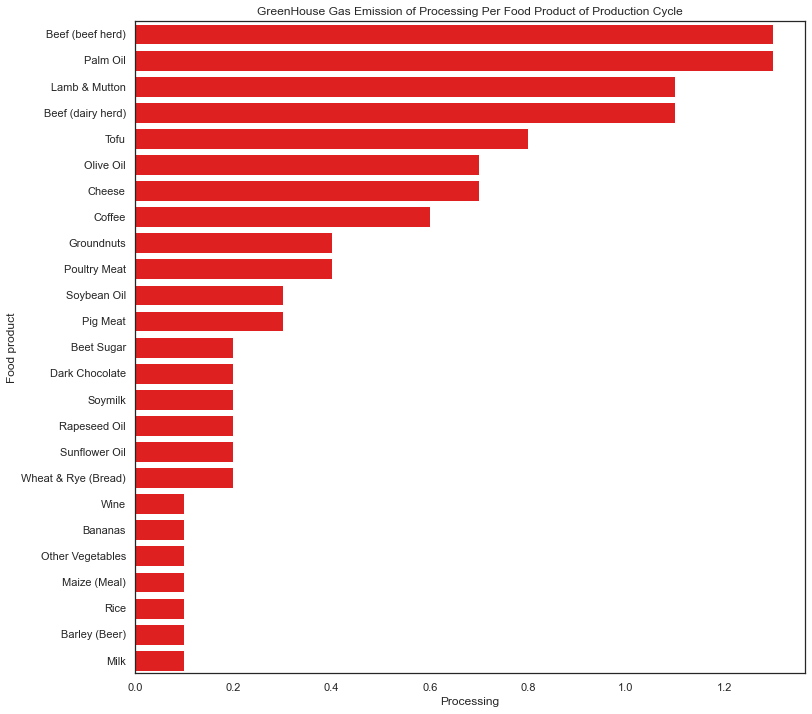

,Food product,Processing
33,Beef (beef herd),1.3
16,Palm Oil,1.3
35,Lamb & Mutton,1.1
34,Beef (dairy herd),1.1
14,Tofu,0.8


In [74]:
process= food_emission('Processing','red')
process.head()

##### Transport
Emission from energy use in the transportation of processed farm products around the world. This inlcude fuel burnt by delivery trucks carrying finisb=hed agricultural products. Cane Sugar, Beet Sugar and Olive Oil are the top 3 emitters. Transport emissions are very small. It ranges between 1.3 to 0.1.

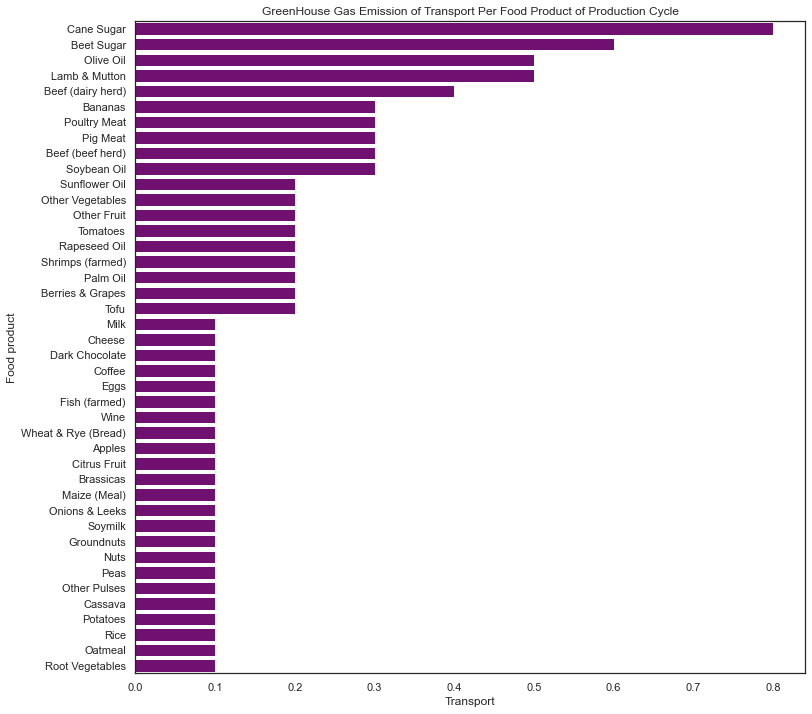

,Food product,Transport
7,Cane Sugar,0.8
8,Beet Sugar,0.6
19,Olive Oil,0.5
35,Lamb & Mutton,0.5
34,Beef (dairy herd),0.4


In [75]:
transport = food_emission('Transport','purple')
transport.head()

##### Packging
Emissions from the production of packaging materials used for packaging agricultural products. Coffee has the highest emissions. Most of the emission are from packaging of plant based production.  (The top 10 emitters are all plant based products..)

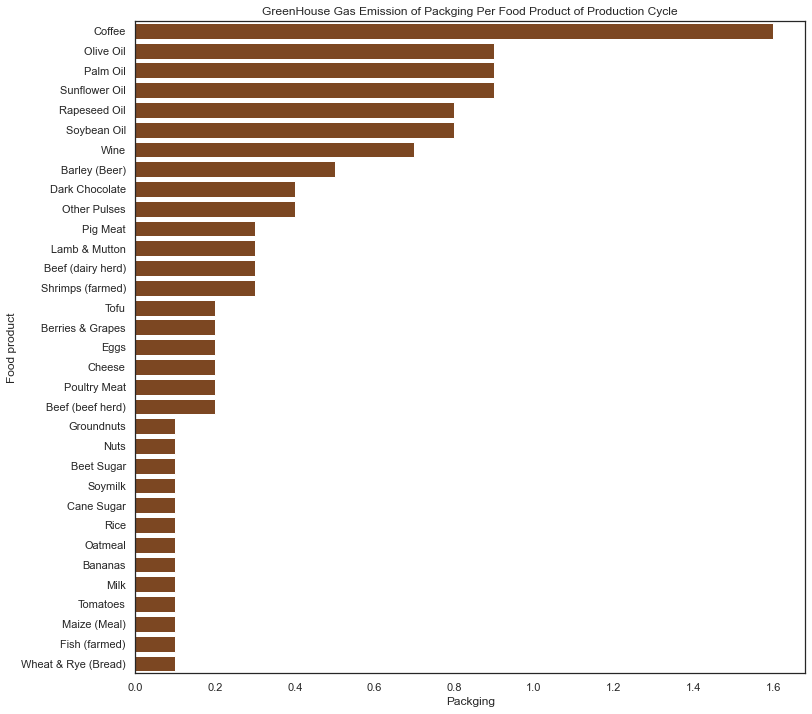

,Food product,Packging
31,Coffee,1.6
19,Olive Oil,0.9
16,Palm Oil,0.9
17,Sunflower Oil,0.9
18,Rapeseed Oil,0.8


In [76]:
packaging = food_emission('Packging','saddlebrown')
packaging.head()

##### Retail
Emission from energy used in storing finished agricultural products in retail shops. Activities like refrigeration on a large scale of finished products leads to the release of GHG. Emission from ranges from 0.1 to 0.3. 


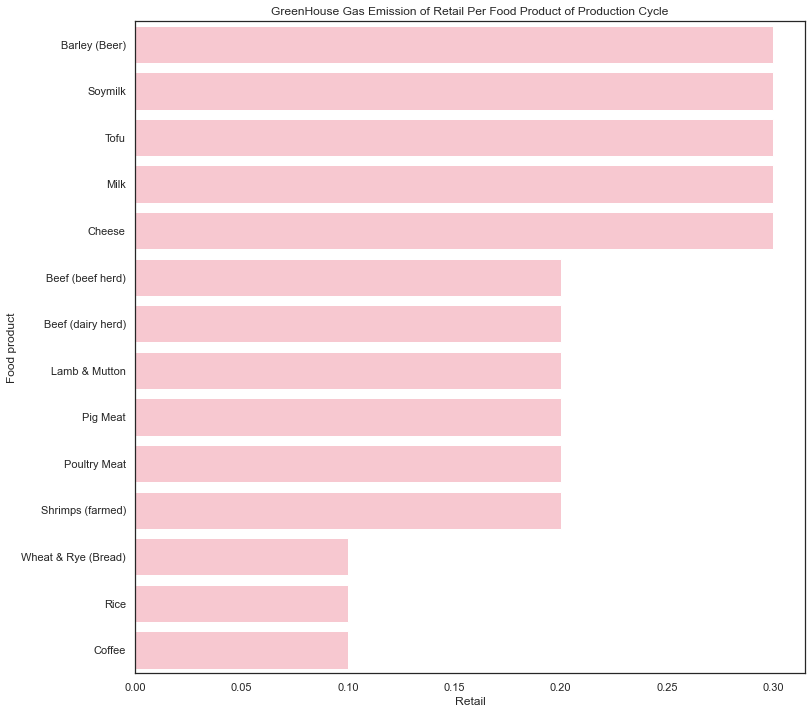

,Food product,Retail
2,Barley (Beer),0.3
13,Soymilk,0.3
14,Tofu,0.3
38,Milk,0.3
39,Cheese,0.3


In [77]:
retail = food_emission('Retail','pink')
retail.head()

### Eutrophying emissions
Eutrophication is the pollution of water bodies and ecosystems with excess nutrients. It is the availability of excess nutrients such as nitrogen and phosphorus that limits the growth of plant life in an ecosystem. Comparing the impact of food production by looking at eutrophying emissions. They are measured in grams of phosphate equivalents.
The dataset provides three ways by which the comparison is made.

    The eutrophying emissions from the production of one kilogram of food product.
    The eutrophying emisiions from how rich in protein of a food product ( 100g of protein).
    The eutrophying emisiions from  how rich in protein of a food energy (1000 kilocalories).
In the charts below we can see eutrophying emissions of foods measured in grams of phosphate equivalents (gPO₄eq) per kilogram, 100 grams of protein, and per 1000 kilocalories.
https://en.wikipedia.org/wiki/Eutrophication#:~:text=Eutrophication%20is%20a%20process%20of%20increasing%20biomass%20generation,growth%20of%20aquatic%20plants%2C%20both%20macrophytes%20and%20phytoplankton.
https://ourworldindata.org/environmental-impacts-of-food
    https://www.thenewecologist.com/2017/09/effects-eutrophication-environment/#:~:text=Eutrophication%20is%20a%20condition%20where%20high%20nutrient%20concentration,of%20Eutrophication%20on%20Environment%20Increased%20Biomass%20of%20Phytoplankton

In [78]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs) #https://www.statology.org/seaborn-barplot-show-values/

In [79]:
def gas_emission(column):
    """This function requires a column name of greenhouse gases footprint bar graph, filter outs 
    food products with zero emissions, calculates the total percentage of different stages in the lifecycle of food production 
    in relation to total emission and plots the emission per food product.
    Args:
        column name as a string
    Returns:
        A bar graph of food product per emission and first five rows of emission a new dataframe with product name,
        
    """
    emission= food[~(food[column] == 0)][['Food product',column]].sort_values(column,ascending=False)
    emission = emission[['Food product',column]]
     
    plt.figure(figsize=(20,20))
    p=sns.barplot(y='Food product',x=column,data=emission)
    plt.title(f'{column}')
    show_values(p,'h',space=0.2)
    plt.show()
    return emission

###### Eutrophying Emissions per 1000kcal (gPO₄eq per 1000kcal)
Coffee, Beef(diary herd),Fish(farmed) and  Beef(beef herd) recorded more than 110 gPO₄eq per 1000kcal. These are the top emitters. Coffee, which contain caffeine, leads with 197gPO₄eq per 1000kcal. Plant based foods like cassava, palm oit and beet sugar recoded less than 2 gPO₄eq per 1000kcal.

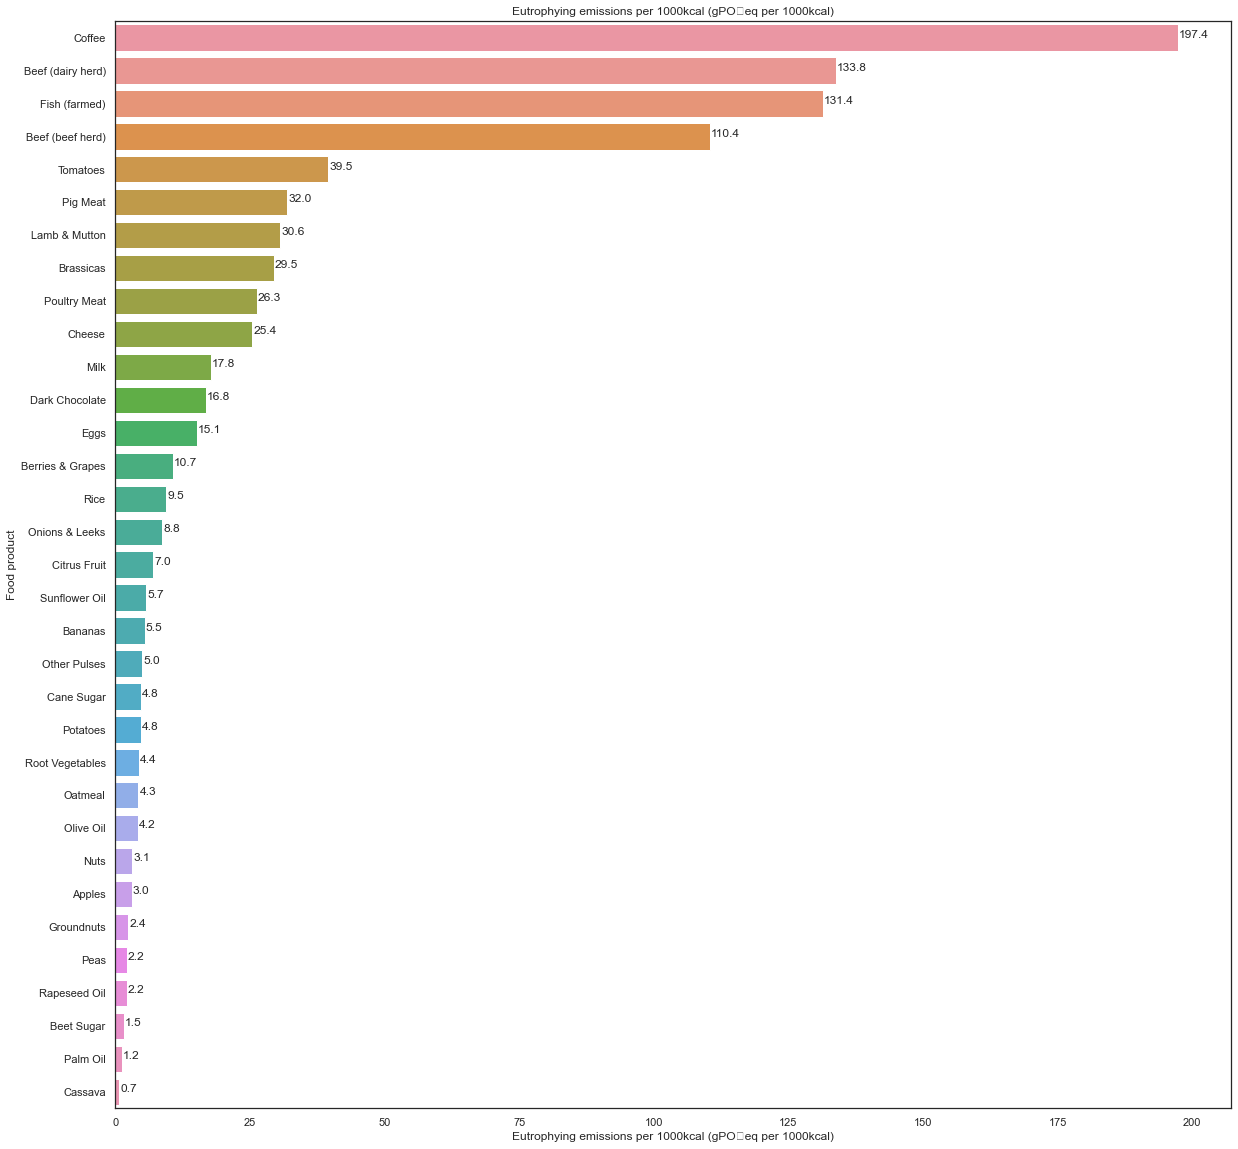

,Food product,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)
31,Coffee,197.357143
34,Beef (dairy herd),133.805861
41,Fish (farmed),131.351955
33,Beef (beef herd),110.406593
20,Tomatoes,39.526316


In [80]:
e_100kcal = gas_emission('Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)')
e_100kcal.head()

##### Eutrophying emissions per kilogram (gPO₄eq per kilogram)
Beef(dairy herd), beef(beef herd) and fish(farmed), which are animal based products recorded more than 235 gPO₄eq per kilogram.
The bottom  5 foods were plant based products, that is, cassava, soymilk, apples, root vegetables and citrus fruit.

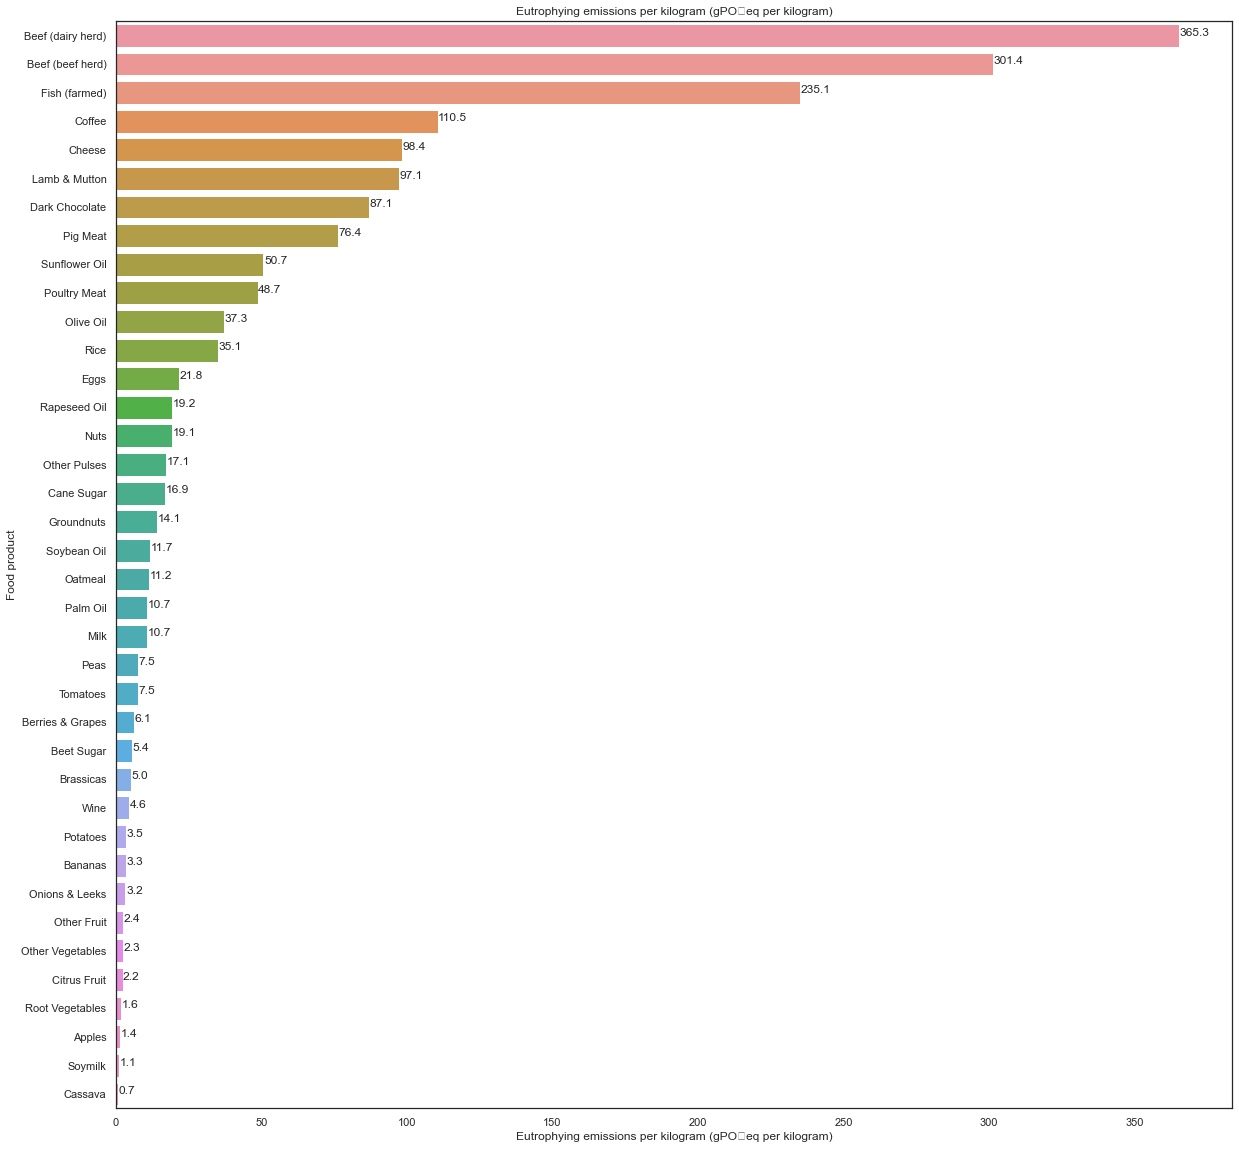

,Food product,Eutrophying emissions per kilogram (gPO₄eq per kilogram)
34,Beef (dairy herd),365.29
33,Beef (beef herd),301.41
41,Fish (farmed),235.12
31,Coffee,110.52
39,Cheese,98.37


In [81]:
e_kilo = gas_emission('Eutrophying emissions per kilogram (gPO₄eq per kilogram)')
e_kilo.head()

##### Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)
Beef(dairy herd), Dark chocolate, beef(beef herd),coffee and fish(farmed) recorded more than 100 gPO₄eq per 100 grams protein. Peas, groundnuts, cassava, other pulses and oatmeal are the bottom emitters.


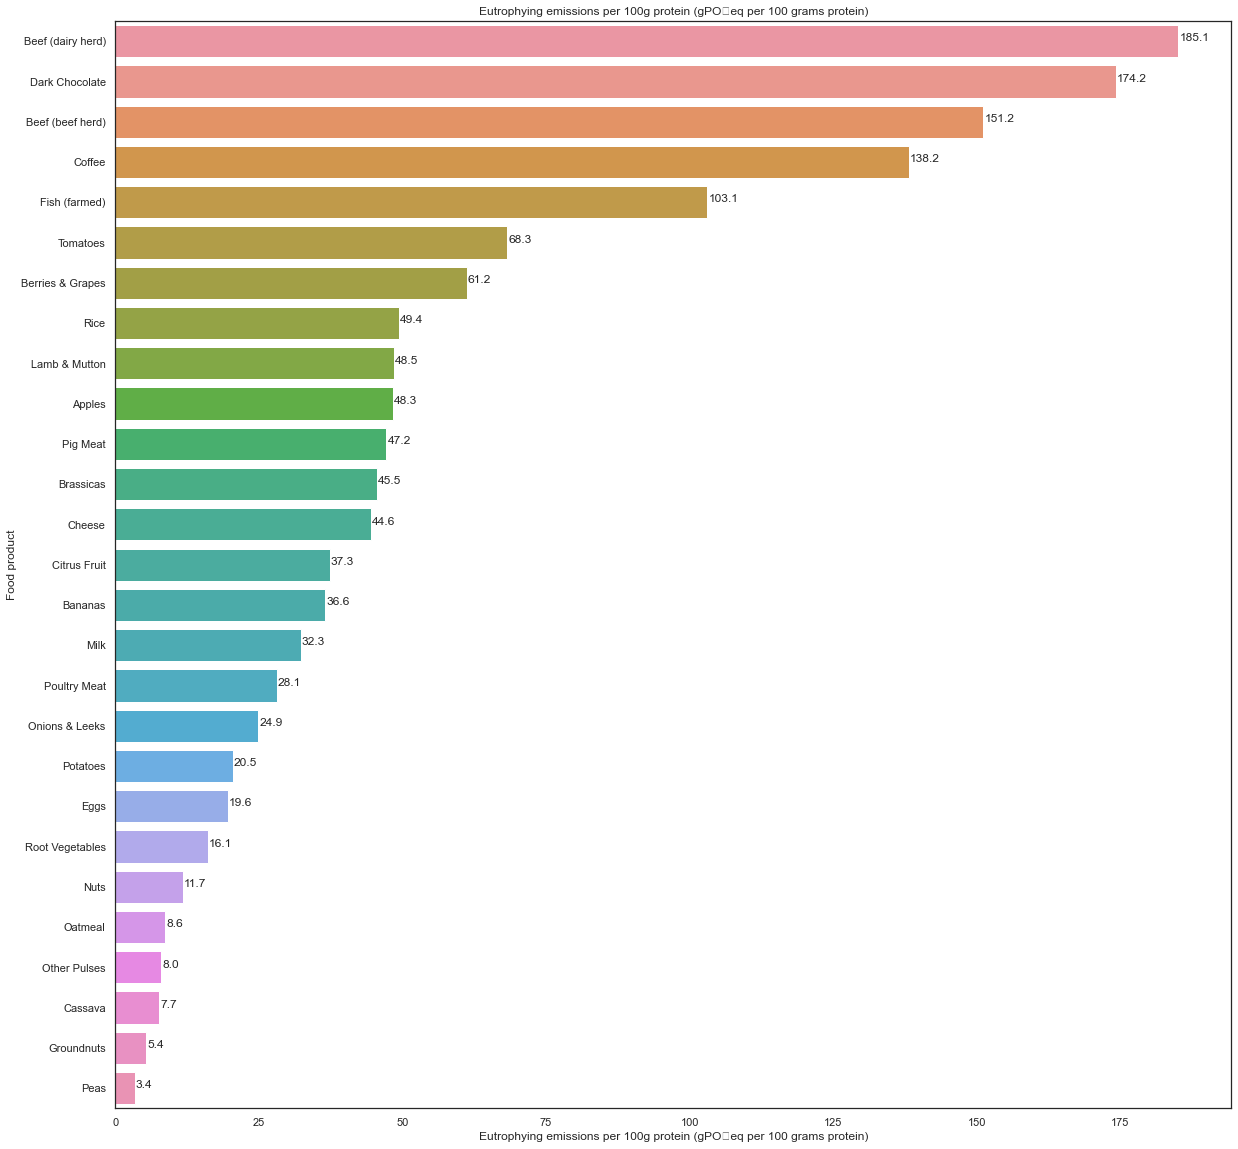

,Food product,Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)
34,Beef (dairy herd),185.050659
32,Dark Chocolate,174.160000
33,Beef (beef herd),151.158475
31,Coffee,138.150000
41,Fish (farmed),103.100197


In [82]:
e_protein = gas_emission('Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)')
e_protein.head()

### Freshwater withdrawals Of Food Products
Freshwater withdrawal is the measure of how much water is used from a terrestrial source. This includes lakes, rivers, groundwater, and other forms of surface water. This water is directed toward a variety of uses such as irrigation, agrochemical application, crop cooling, and frost control and positively affects yields if used properly.
How does the freshwater withdrawals of food products compare
The dataset provides three ways by which the comparison is made.

    The freshwater withdrawal from the production of litres of food product.
    The freshwater withdrawal from how rich in protein of a food product ( 100g of protein).
    The freshwater withdrawal from how rich in protein of a food energy (1000 kilocalories).
In the charts below we can see freshwater withdrawals of foods measured in litres per kilogram, 100 grams of protein, and 1000 kilocalories.

https://agimpacts.mit.edu/indicators/freshwater-withdrawal/

##### Freshwater withdrawals per 1000kcal (liters per 1000kcal)
Top 5 foods were Fish(farmed), tomaotes, cheese, milk and beef(dairy herd) recorded over 994 liters per 1000kcal. Palm oil had the least water withdrawal of 0.7 liters per 1000kcal.

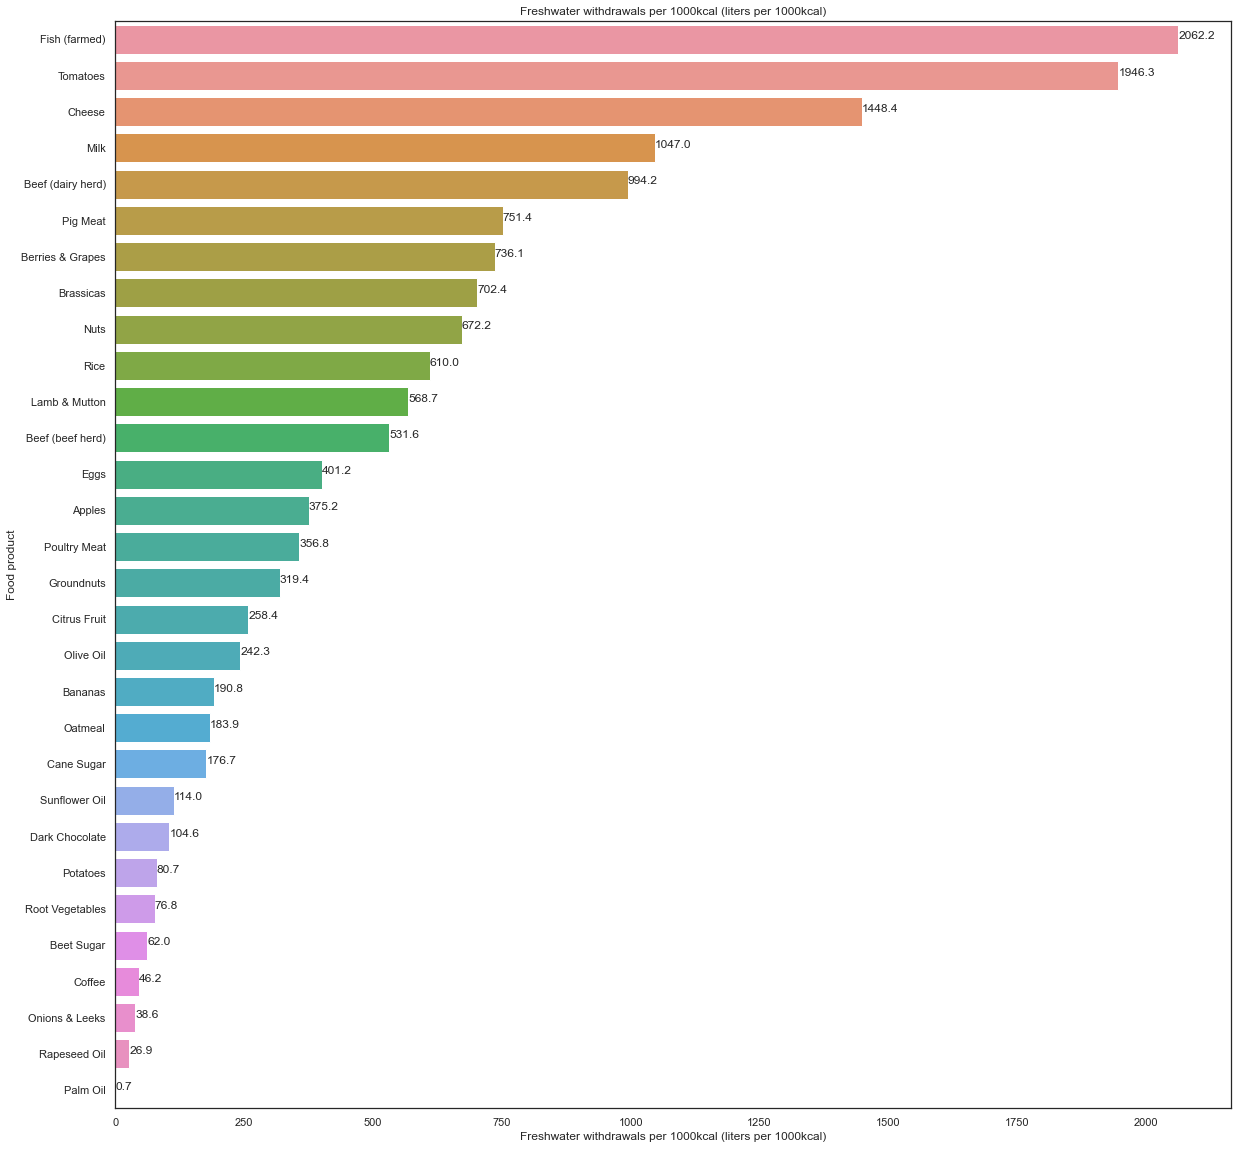

,Food product,Freshwater withdrawals per 1000kcal (liters per 1000kcal)
8,Beet Sugar,62.022792
31,Coffee,46.250000
21,Onions & Leeks,38.648649
18,Rapeseed Oil,26.889140
16,Palm Oil,0.723982


In [83]:
fresh_100kcal = gas_emission('Freshwater withdrawals per 1000kcal (liters per 1000kcal)')
fresh_100kcal.tail()

##### Freshwater withdrawals per 100g protein (liters per 100g protein)
Apples, berries & grapes, tomatoes and rice recorded over 3100 liters per 100g protein. Only Coffee has a below 100 liters per 100g protein. 

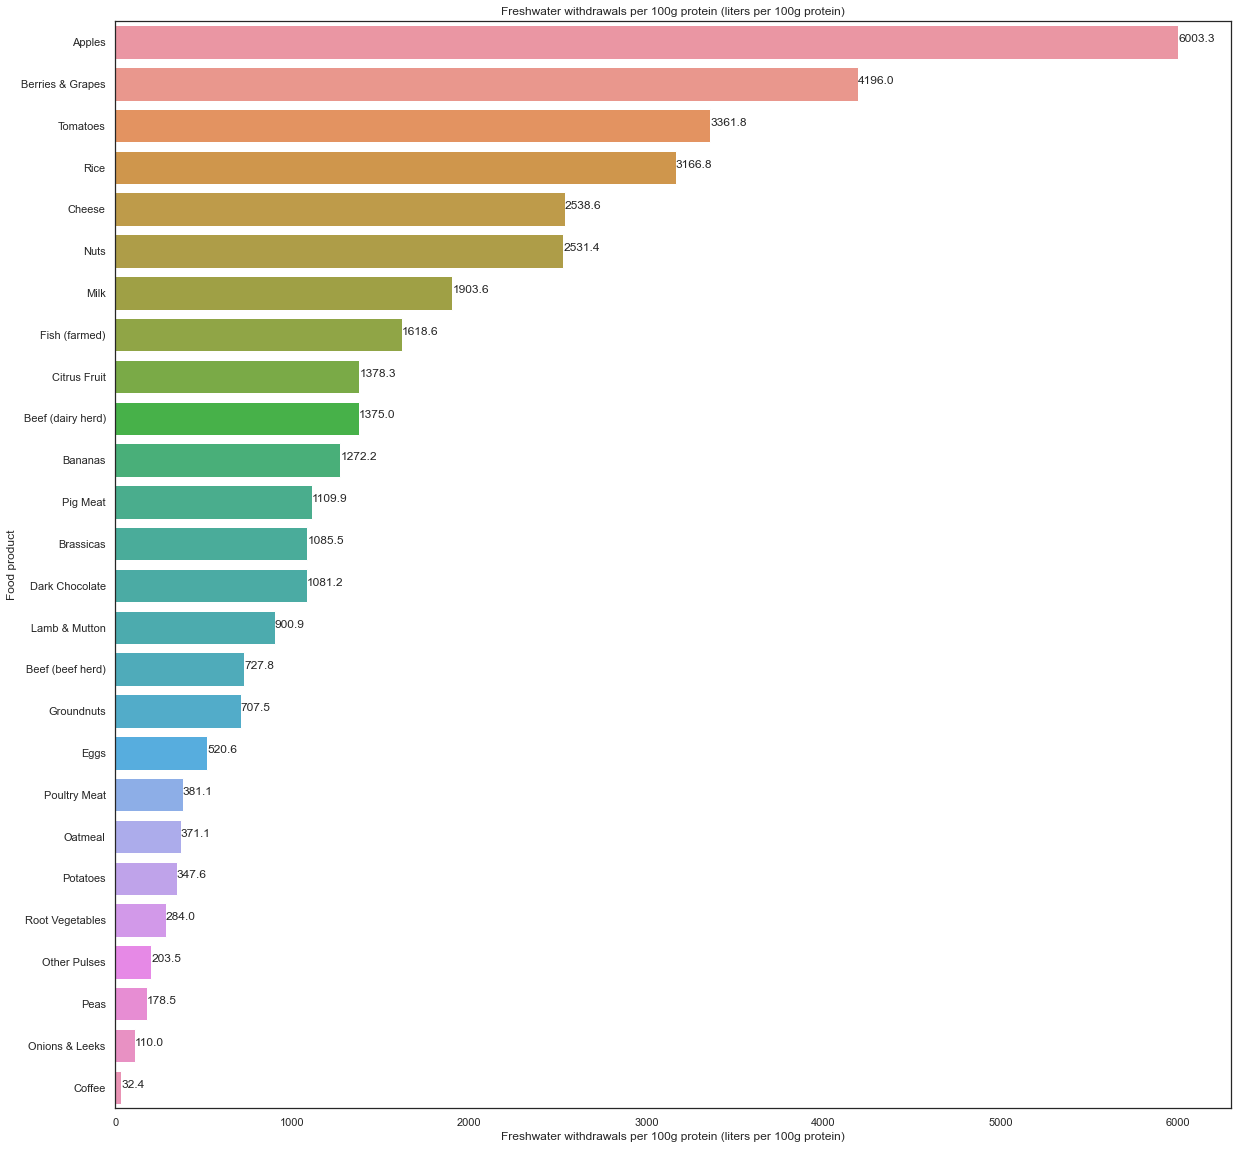

,Food product,Freshwater withdrawals per 100g protein (liters per 100g protein)
22,Root Vegetables,284.000000
9,Other Pulses,203.503036
10,Peas,178.487849
21,Onions & Leeks,110.000000
31,Coffee,32.375000


In [84]:
fresh_protein = gas_emission('Freshwater withdrawals per 100g protein (liters per 100g protein)')
fresh_protein.tail()

##### Freshwater withdrawals per kilogram (liters per kilogram)
Cheese uses the most water in its production with over 5100 liters per kilogram, followed by nuts and fish(farmed). Soymilk, coffee,onions & leeks and palm oil recoded less than 30 liters per kilogram.

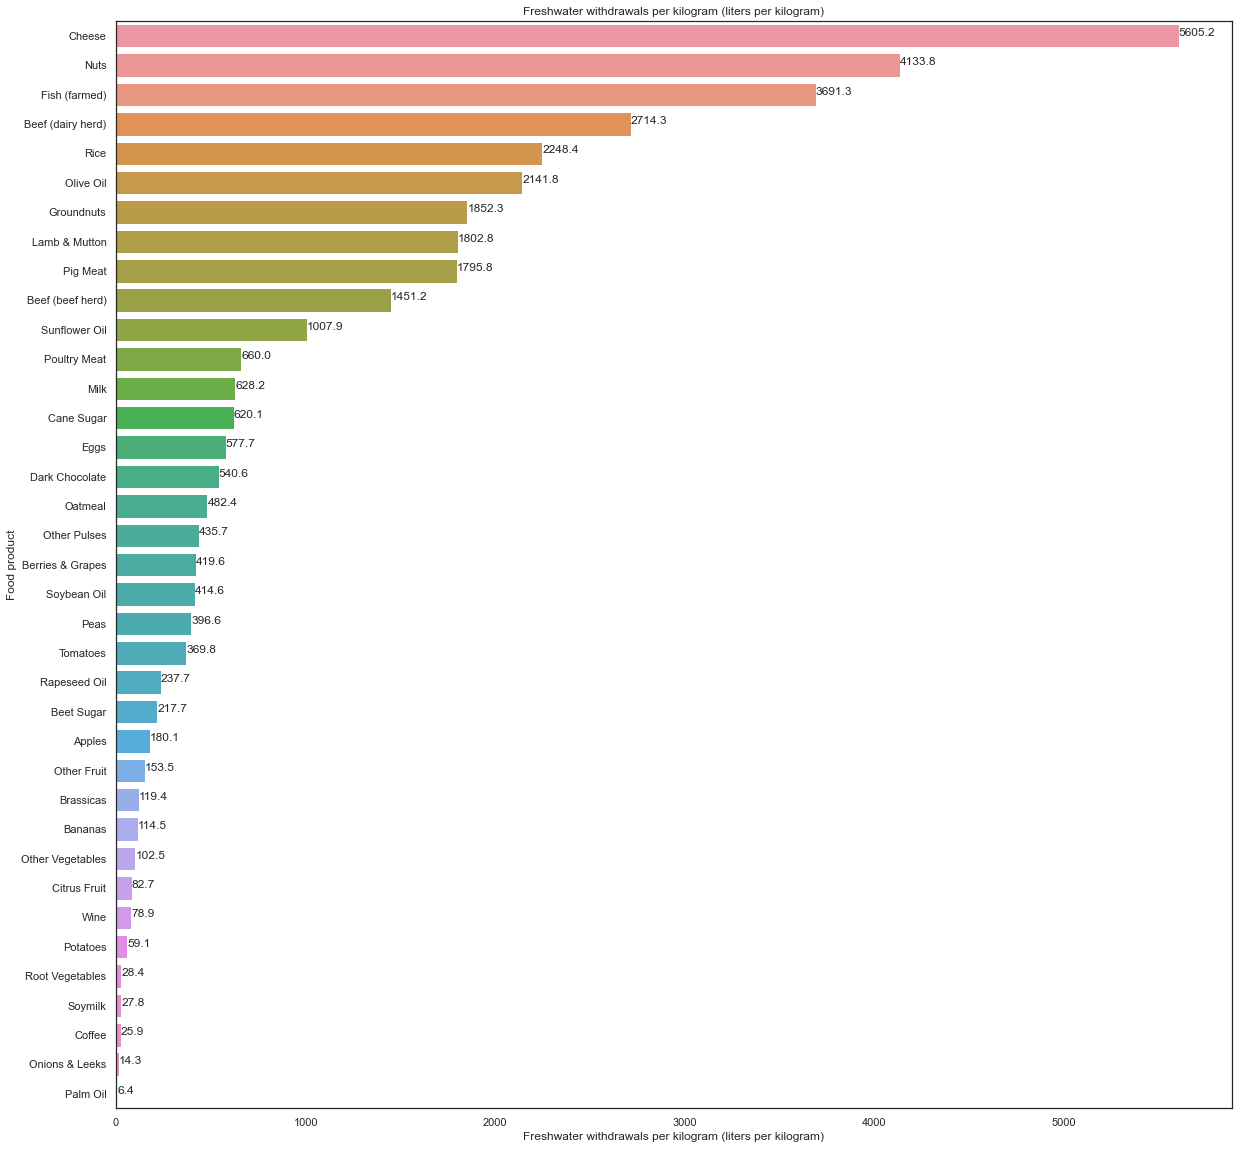

,Food product,Freshwater withdrawals per kilogram (liters per kilogram)
29,Wine,78.9
5,Potatoes,59.1
22,Root Vegetables,28.4
13,Soymilk,27.8
31,Coffee,25.9
21,Onions & Leeks,14.3
16,Palm Oil,6.4


In [85]:
fresh_kilo = gas_emission('Freshwater withdrawals per kilogram (liters per kilogram)')
fresh_kilo.tail(7)

### Greenhouse Gas Emissions
Greenhouse gas emissions comparason of food produts per their nutitional values produced. Here we measure GHG emissions based on 
 
    kilogram of Carbon dioxide eqivalents per 1000 kilocalories produced.
    kilogram of Carbon dioxide eqivalents per 100 grams of protein.
In the charts below we can see greenhouse emissions of foods measured.

##### Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)
Coffee produces the most kgCO₂eq per 1000kcal of 51,followed by beef(beef herd) of 36 and lamb & mutton of 13

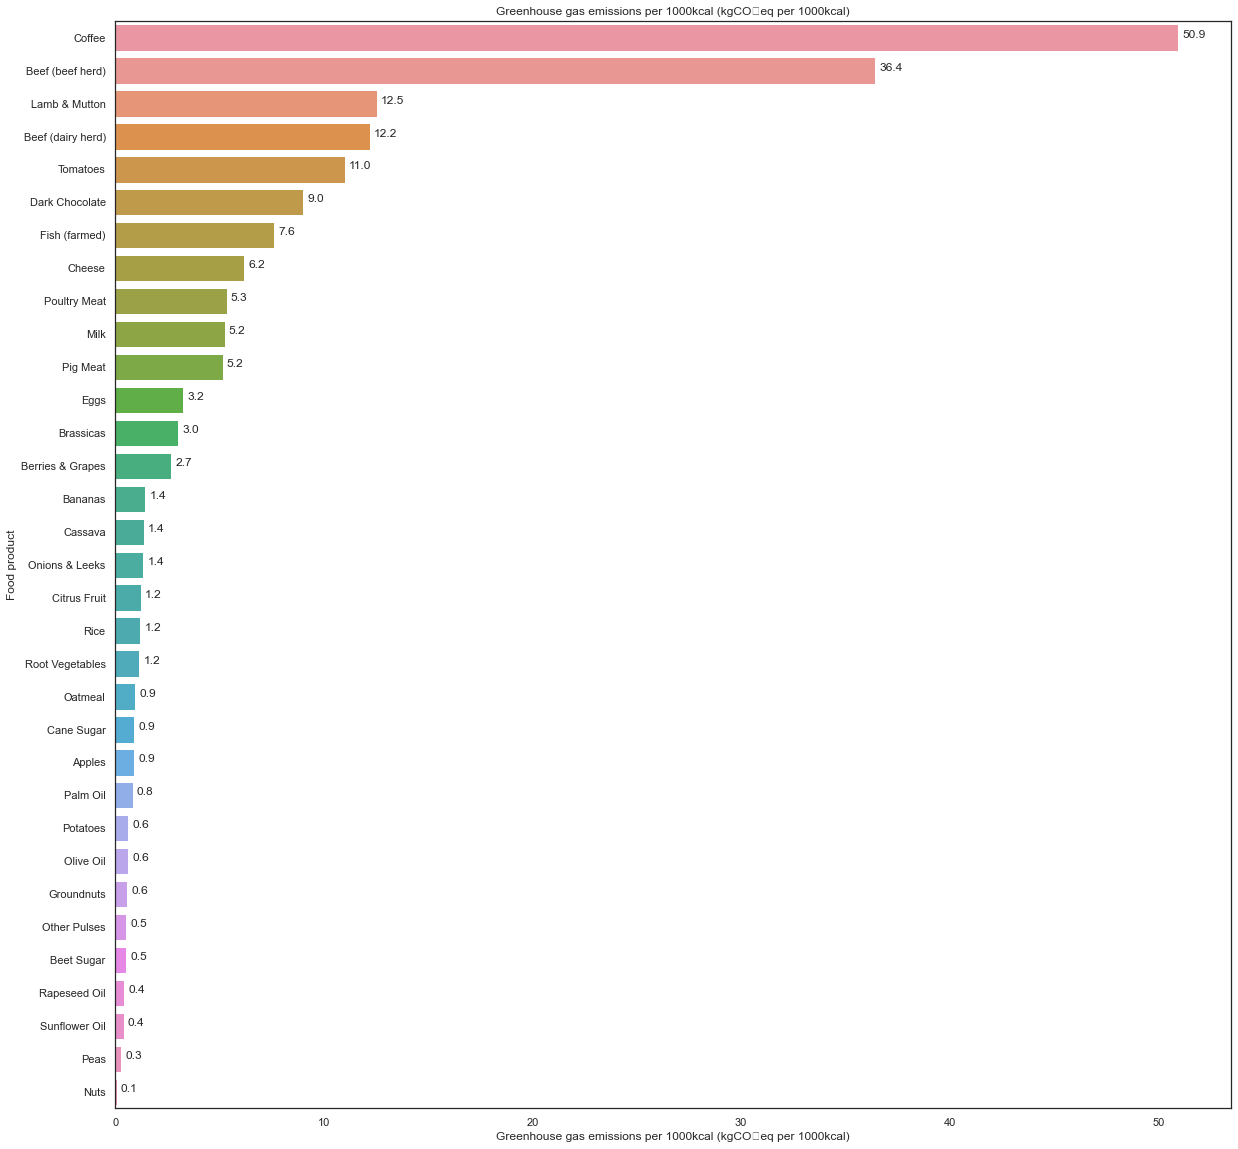

,Food product,Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)
8,Beet Sugar,0.515670
18,Rapeseed Oil,0.426471
17,Sunflower Oil,0.407240
10,Peas,0.283237
11,Nuts,0.069919


In [86]:
green_1000kcal = gas_emission( 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)')
green_1000kcal.tail()

##### Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)
Dark chocolate, beef(beef herd) and coffee recorded more than 35 kgCO₂eq per 100g protein. Nuts, peas, other pulses, groundnuts and oatmeal recorded less than 2 kgCO₂eq per 100g protein.

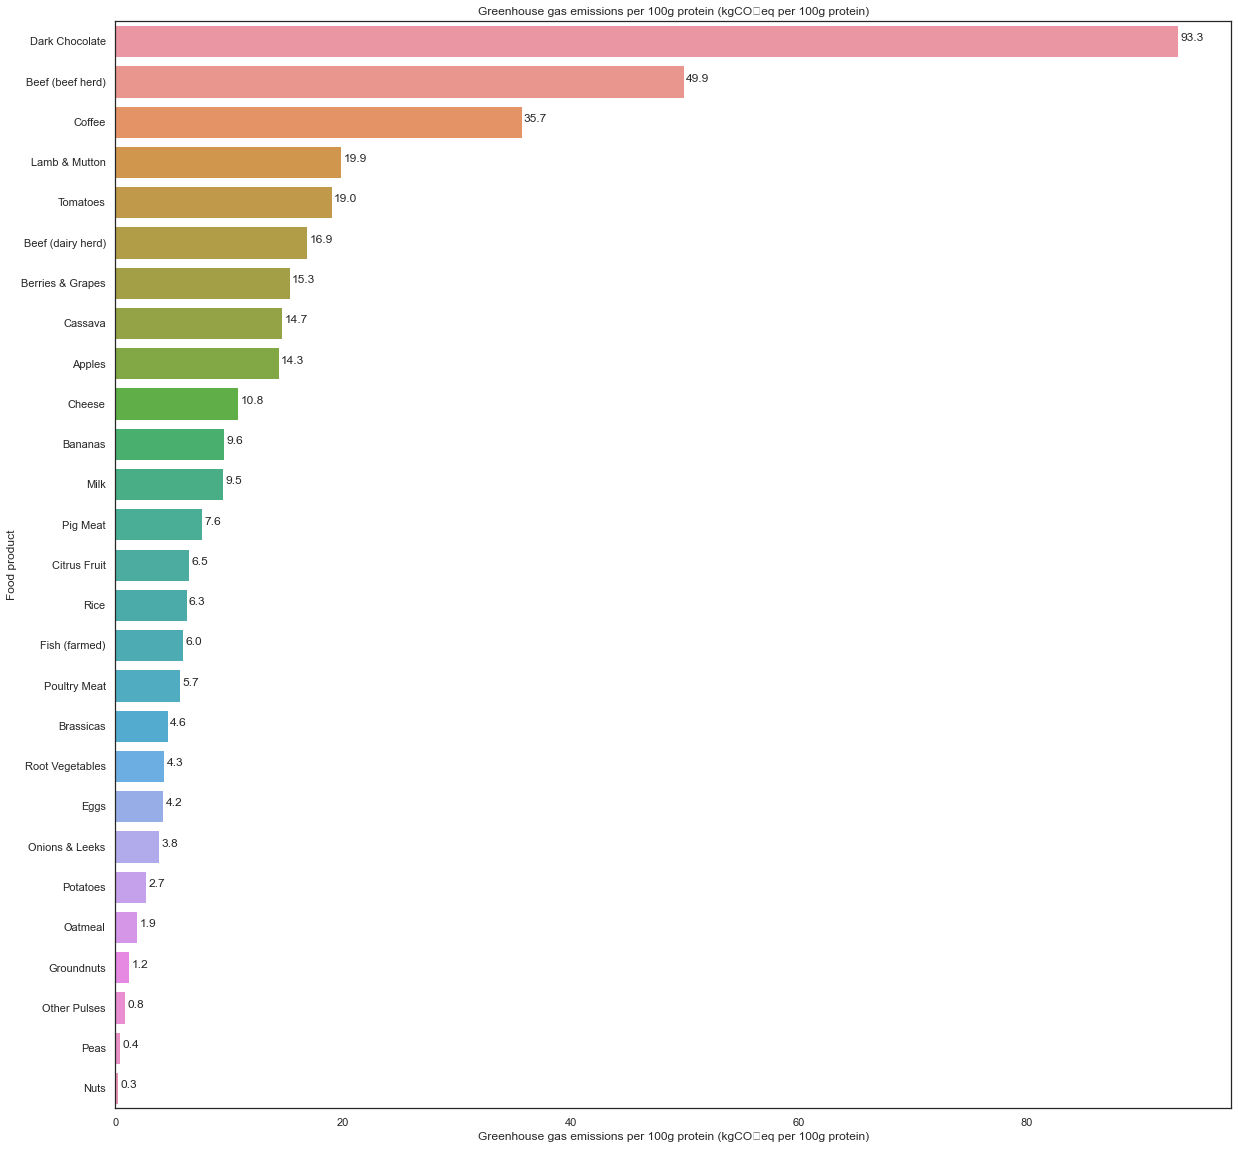

,Food product,Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)
21,Onions & Leeks,3.846154
5,Potatoes,2.705882
3,Oatmeal,1.907692
12,Groundnuts,1.233766
9,Other Pulses,0.836058
10,Peas,0.441044
11,Nuts,0.263319


In [87]:
green_protein = gas_emission('Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)')
green_protein.tail(7)

### Land Use
Land Use refers to the food products that used the most or least land in their production. How does the land use of food products compare. As always, the comparison is based on the mass: land use per one kilogram of food product and the nutritional units: the land used in supplying protein and energy.  Here we measure land use based on
       
       Land use measured in meters squared (m2) per kilogram of food pructs
       Land use measured in meters squared (m2) per 100 grams of protein
       Land use measured in meters squared (m2) per 1000 kilocalories

    

##### Land use per 1000kcal (m² per 1000kcal)
This shows land used in the production of foods produced per 1000kilocalories. From the gragh, beef(herd beef) and lamb & mutton  use more than 116 meters squared of land per 1000kilocalories in their production. These are the top two most animal based food products. The least 5 land used fall below 1 meters squared that is, root vegetables, rice, cane sugar, beet sugr and palm oil. 
These are plant based foods.

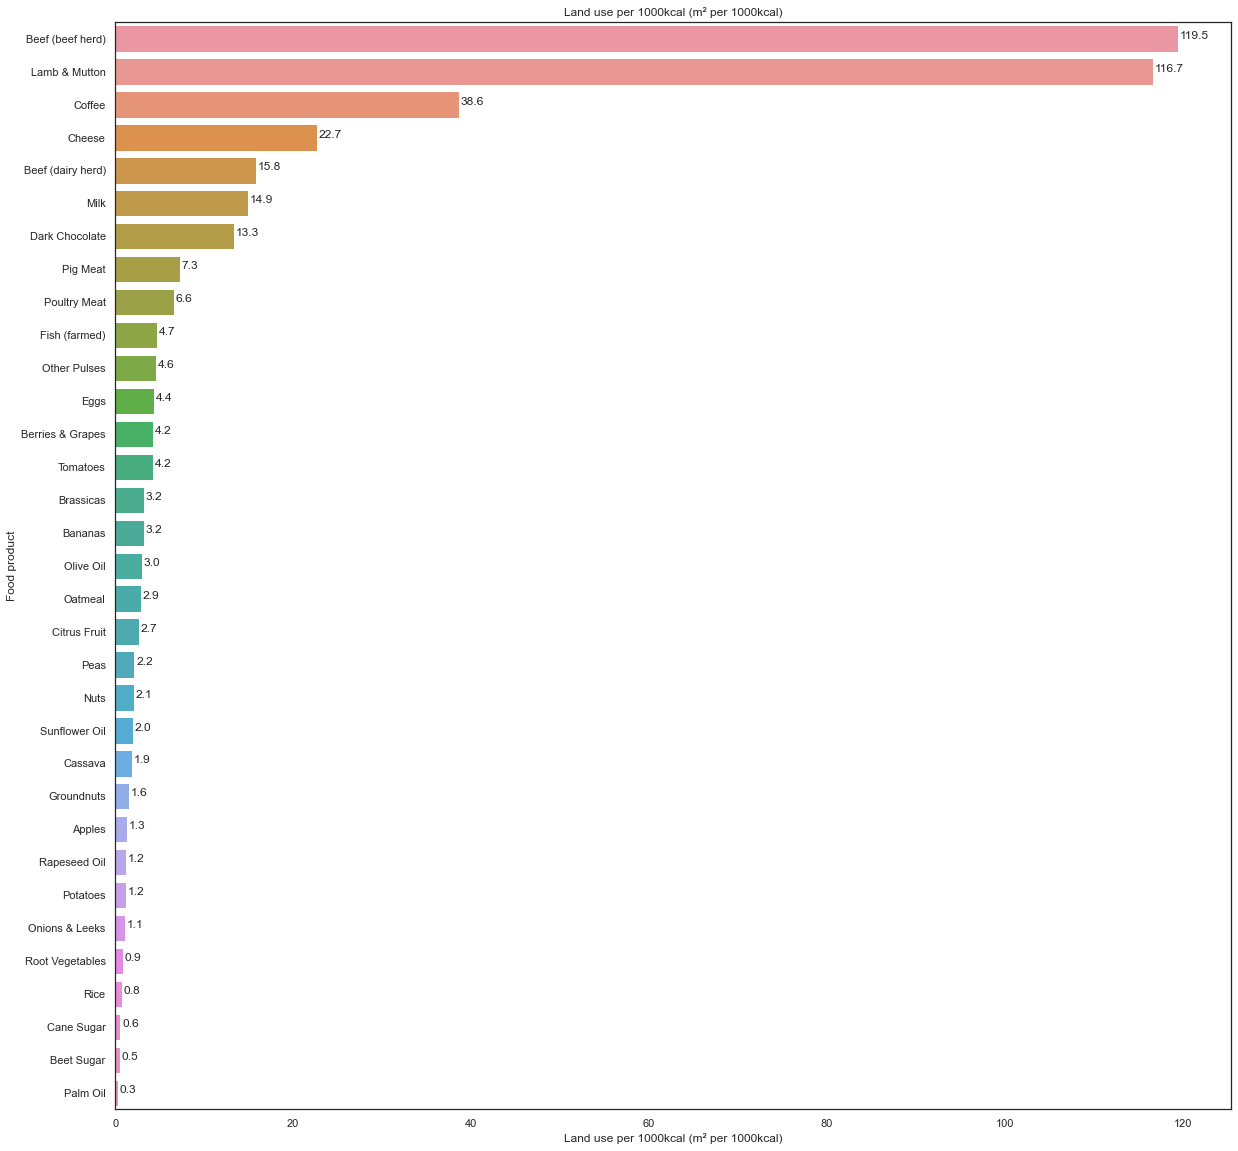

,Food product,Land use per 1000kcal (m² per 1000kcal)
22,Root Vegetables,0.891892
4,Rice,0.759631
7,Cane Sugar,0.581197
8,Beet Sugar,0.521368
16,Palm Oil,0.273756


In [88]:
land_1000kcal = gas_emission('Land use per 1000kcal (m² per 1000kcal)')
land_1000kcal.tail()

##### Land use per kilogram (m² per kilogram)
This shows the land used per kilogram of food product. The two food products used more than 326 meters squared land to produce one kilogram of food. They are Lamb & Mutton and Beef(herd beef). They are animal based foods. All the foods that used less than 1 meter square per one kilogram of food produced are plant based. These includes soymilk, apples,root vegetables etc.

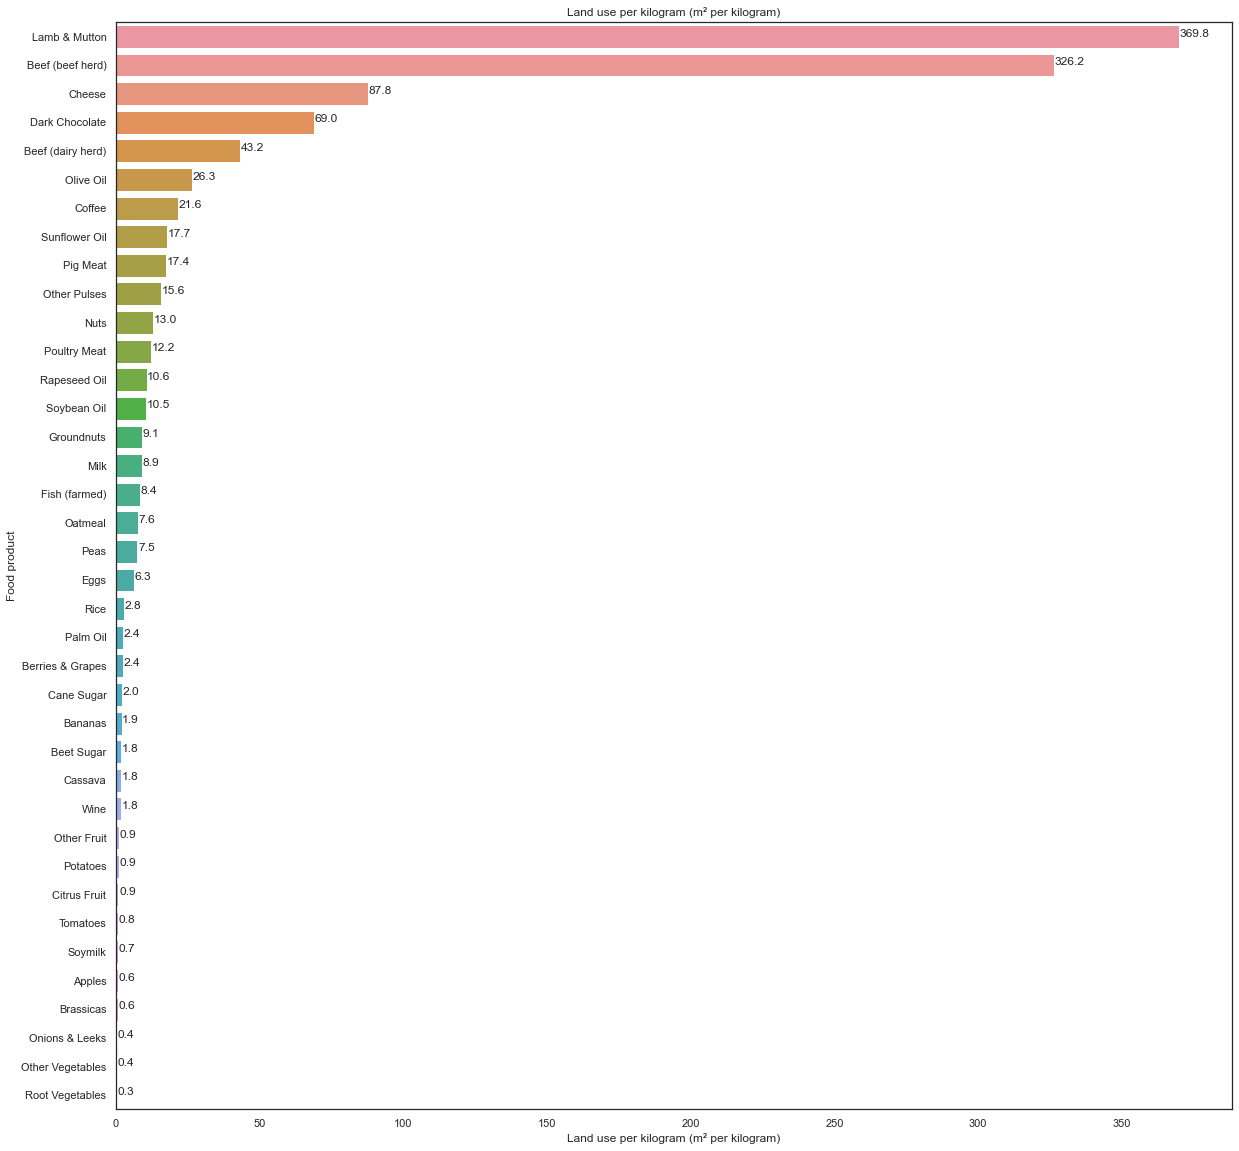

In [89]:
land_kilo = gas_emission( 'Land use per kilogram (m² per kilogram)')

##### Land use per 100g protein (m² per 100g protein)
Land used to produce 100grams of protein per food product. From the graph, Lamb & Mutton uses 184.8 meter squares,followed by beef (beef herd) with 163.6 m² and dark chocolate with 137.9m². The followong food products used less than 5m² land, rice, fish(farmed), groundnuts,peas, root vegatables and onions & leeks.

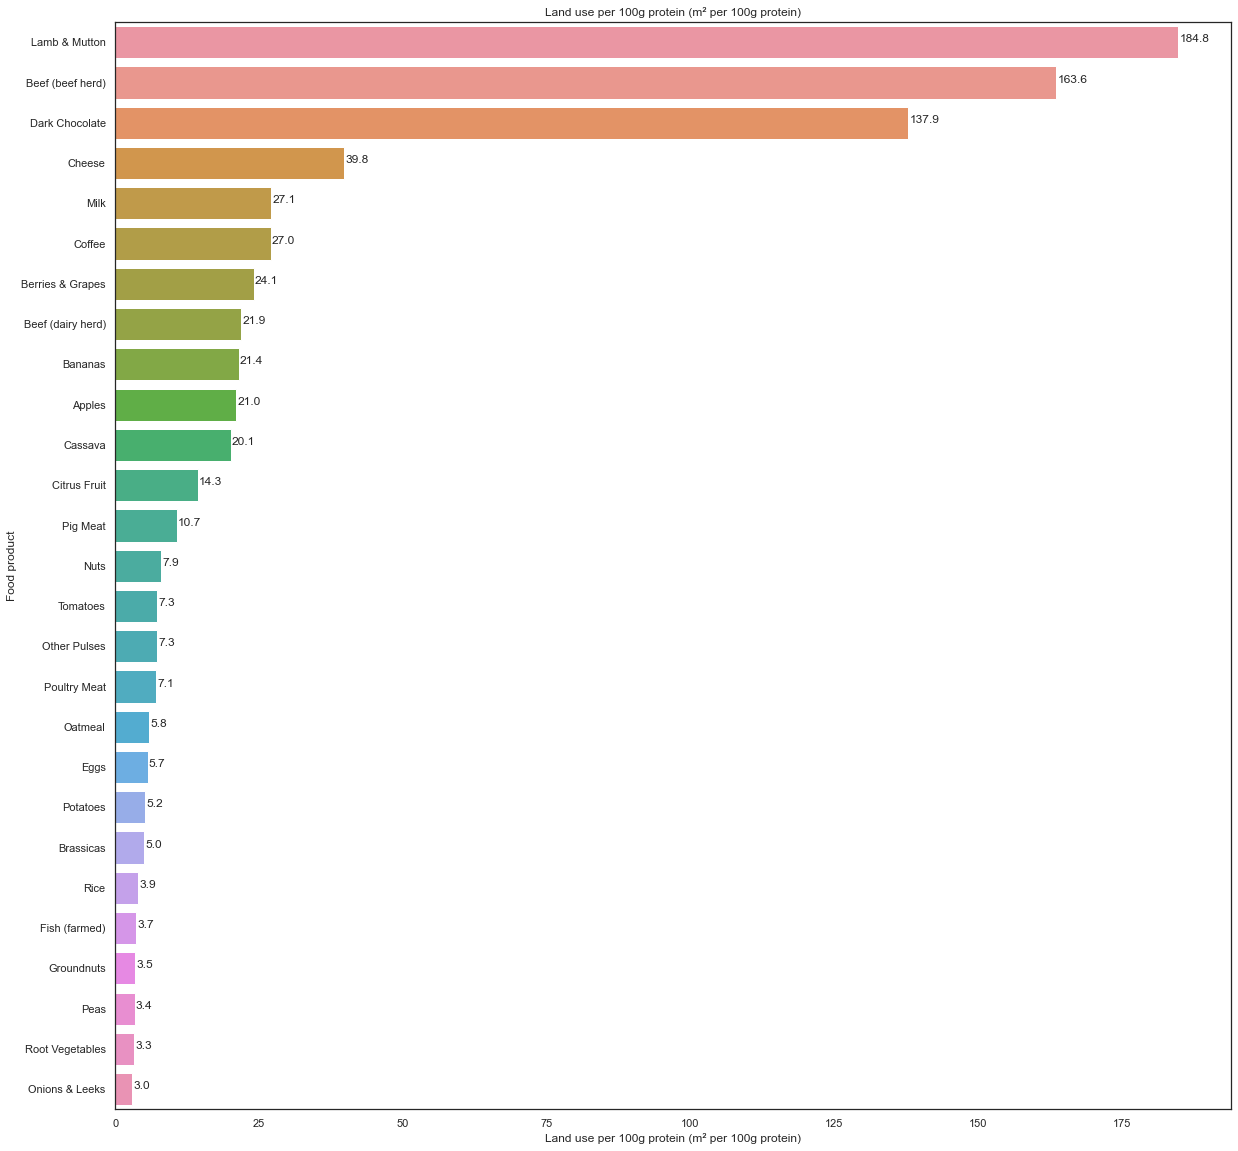

In [90]:
land_protein = gas_emission('Land use per 100g protein (m² per 100g protein)')

### Scarcity-weighted water
Scarcity-weighted water use represents freshwater use weighted by local water scarcity. Water scarcity is the lack of water resources to meet the demand for food production in this context. Water scarcity varies across the world: some regions have abundant water resources meaning, agricultural water demands have little impact whilst others experience severe water stress. Here we measure scarcity-weighted water use based on 

    Land use measured in liters (L) per kilogram of food pructs
    Land use measured in liters (L) per 100 grams of protein
    Land use measured in liters (L) per 1000 kilocalories


##### Scarcity-weighted water use per kilogram (liters per kilogram)
Olive oil, Cheese and Nuts used more than 170000 Litres of water per kilogram produced. Palm oil used the least liters of water of 32.6 liters

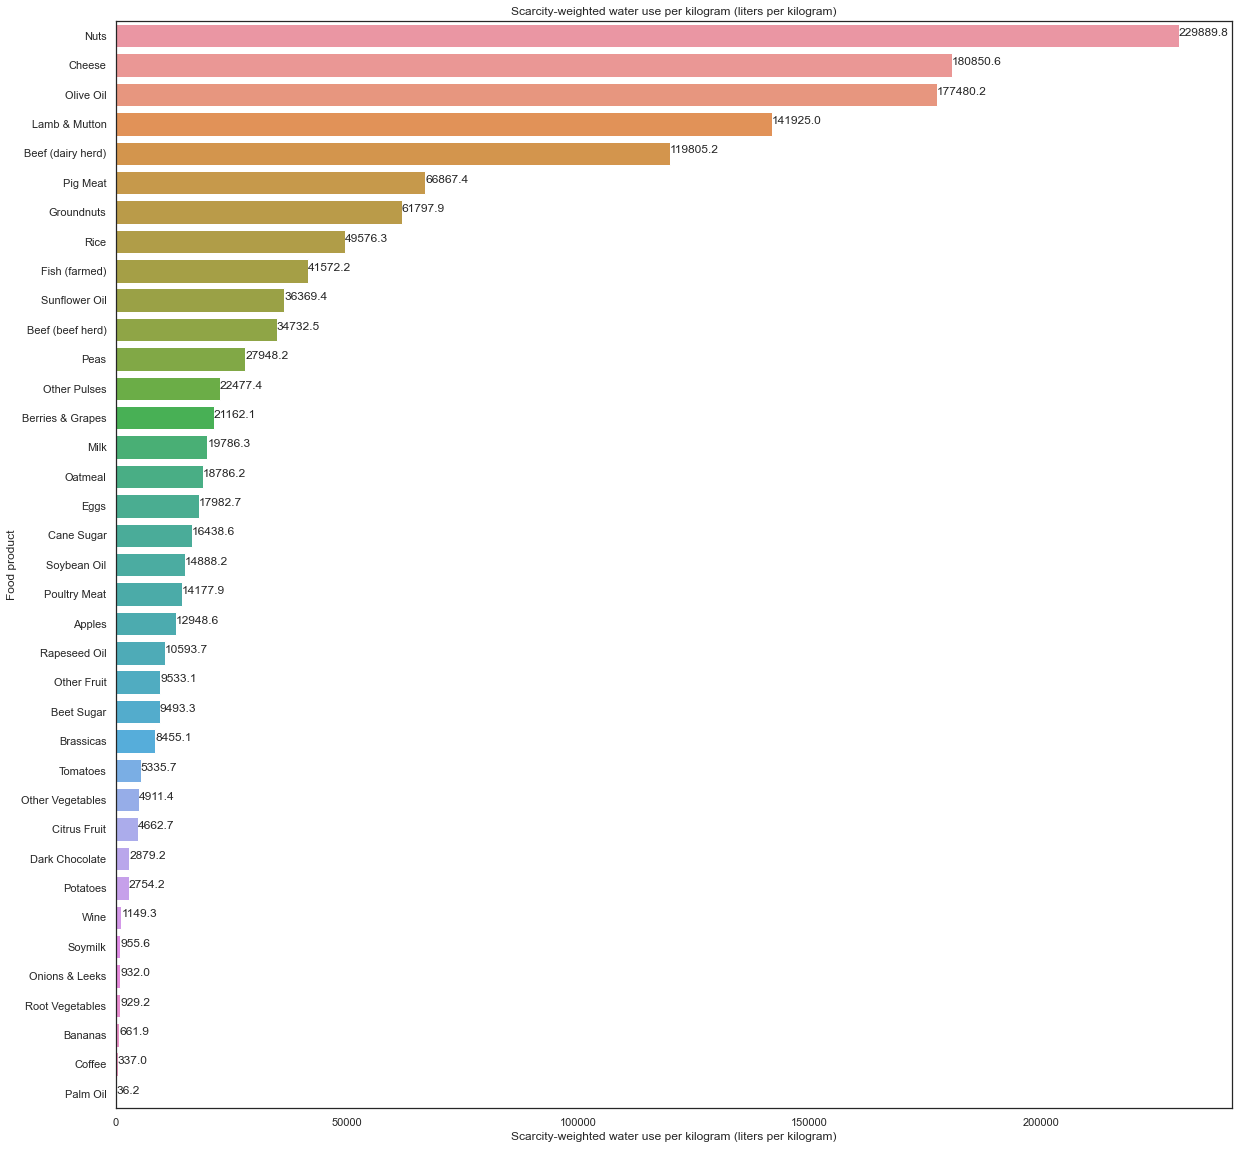

,Food product,Scarcity-weighted water use per kilogram (liters per kilogram)
11,Nuts,229889.8
39,Cheese,180850.6
19,Olive Oil,177480.2
35,Lamb & Mutton,141925.0
34,Beef (dairy herd),119805.2


In [91]:
scarcity_kilo = gas_emission('Scarcity-weighted water use per kilogram (liters per kilogram)')
scarcity_kilo.head()

In [92]:
food.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

##### Scarcity-weighted water use per 100g protein (liters per 100g protein)
Appleused more than 431620 Litres of water, followed by berries & grapes of 211621 liters and Nuts of 140777.6 liters per 100grams of protein produced. These are the top 3 food products. Coffee used the least water of  421 liters.

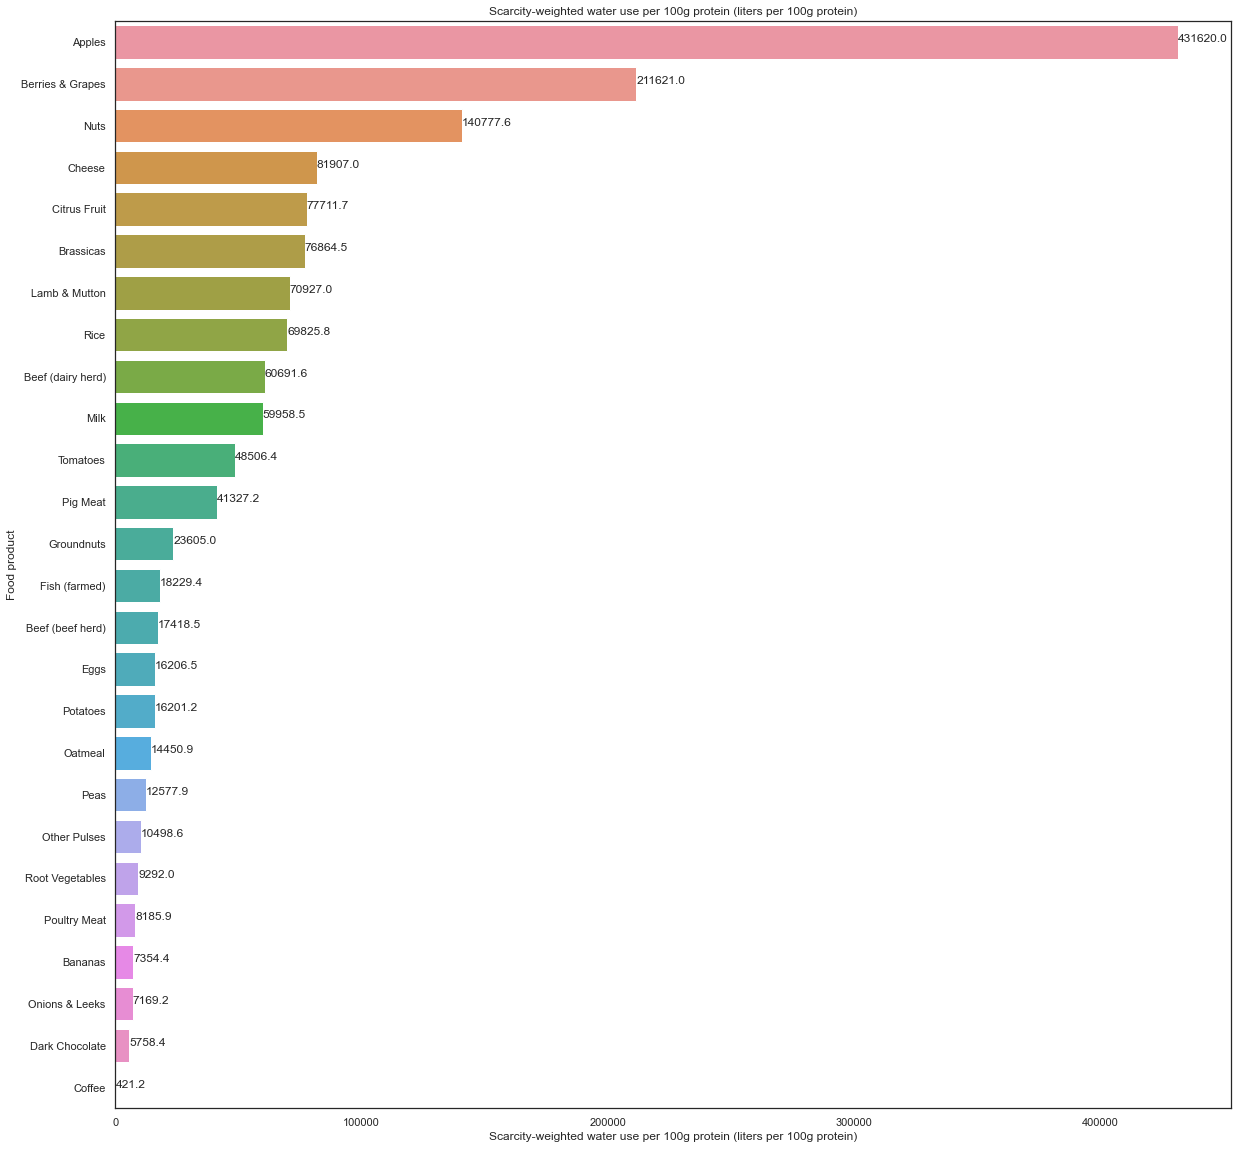

,Food product,Scarcity-weighted water use per 100g protein (liters per 100g protein)
27,Apples,431620.00000
28,Berries & Grapes,211621.00000
11,Nuts,140777.58730
39,Cheese,81906.97464
25,Citrus Fruit,77711.66667


In [93]:
scarcity_protein = gas_emission('Scarcity-weighted water use per 100g protein (liters per 100g protein)')
scarcity_protein.head()

##### Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
Brassicas, cheese, lamb & mutton and beef(herd beef) used more than 43000 liters of water per 1000 kilocalories. These are the top 4 food products Palm oil used 4.1 liters of water.

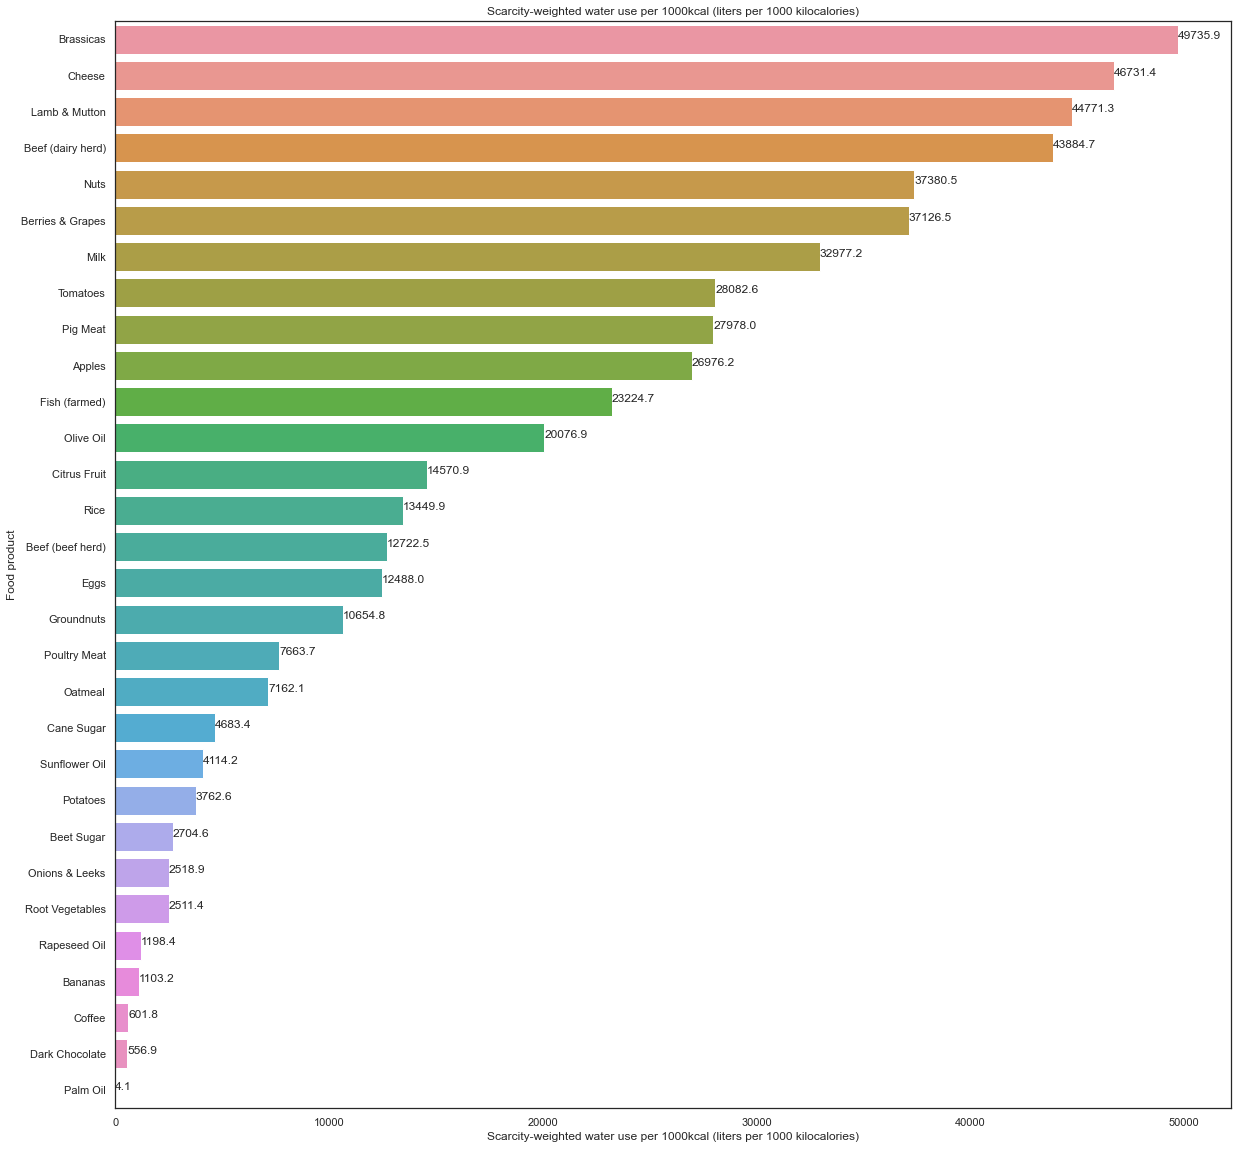

,Food product,Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
23,Brassicas,49735.88235
39,Cheese,46731.42119
35,Lamb & Mutton,44771.29338
34,Beef (dairy herd),43884.68864
11,Nuts,37380.45528


In [94]:
scarcity_1000kcal = gas_emission('Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)')
scarcity_1000kcal.head()

### Correlation Between Environmental Impacts per kilogram of food produced.
The strongest correlations are between Freshwater withdrawals and Scarcity weighted water use of 0.85; followed by GreenHouse emission and land use of 0.82; and lastly eutrophying emissions and greenhouse emission of 0.75.

In [115]:
# Create a new dataframe of all environmental impacts per kilogram of food produced.
per_kilo = food[['Total_emissions','Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
                 'Freshwater withdrawals per kilogram (liters per kilogram)','Land use per kilogram (m² per kilogram)',
                 'Scarcity-weighted water use per kilogram (liters per kilogram)']]
per_kilo.rename(columns={'Total_emissions': 'Greenhouse_Emissions','Eutrophying emissions per kilogram (gPO₄eq per kilogram)':
                        'Eutrophying_Emissions','Freshwater withdrawals per kilogram (liters per kilogram)':
                         'Freshwater_withdrawals','Land use per kilogram (m² per kilogram)': 'Land_use',
                         'Scarcity-weighted water use per kilogram (liters per kilogram)':'Scarcity_weghted_water_use'},
                    inplace =True)

In [116]:
# check the correlation of the new columns 
per_kilo.corr()

,Greenhouse_Emissions,Eutrophying_Emissions,Freshwater_withdrawals,Land_use,Scarcity_weghted_water_use
Greenhouse_Emissions,1.000000,0.751377,0.334524,0.824595,0.268910
Eutrophying_Emissions,0.751377,1.000000,0.522032,0.522653,0.345495
Freshwater_withdrawals,0.334524,0.522032,1.000000,0.287596,0.855976
Land_use,0.824595,0.522653,0.287596,1.000000,0.358504
Scarcity_weghted_water_use,0.268910,0.345495,0.855976,0.358504,1.000000


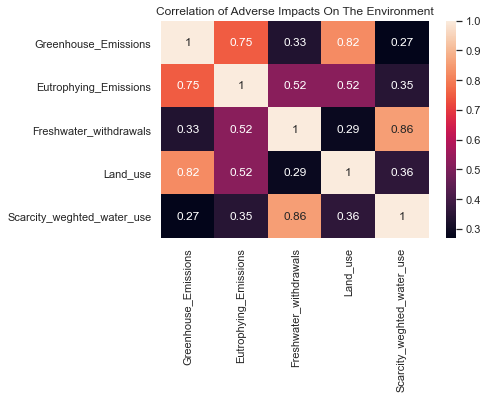

In [117]:
sns.heatmap(per_kilo.corr(),annot=True)
plt.title('Correlation of Adverse Impacts On The Environment')
plt.show()

In [118]:
#create a new function that categorizes food based on whether its plant or animal based.

def food_cat(dataframe):
    """this function takes the food dataframe and categorizes the food products whether it is plant or animal based.
    Args:
        a food dataframe
    Returns:
        categorizes food product column based on whether its plant or animal based. 
    """
    a = dataframe[['Food product']]
    a.loc[:33] = 'plant based' # first 33 rows in the data frame are plant based
    a.loc[33:] = 'animal based'# the remaining 10 are animal based
    return a

In [119]:
per_kilo['food category'] = food_cat(food)
per_kilo.tail()

,Greenhouse_Emissions,Eutrophying_Emissions,Freshwater_withdrawals,Land_use,Scarcity_weghted_water_use,food category
38,2.8,10.65,628.2,8.95,19786.3,animal based
39,21.2,98.37,5605.2,87.79,180850.6,animal based
40,4.5,21.76,577.7,6.27,17982.7,animal based
41,5.1,235.12,3691.3,8.41,41572.2,animal based
42,11.8,0.00,0.0,0.00,0.0,animal based


#### How Does Land Use Contribute to GreenHouse gas emission
Correlation between the Green house emission and land use is 0.82. This is the second strongest correlation among the other emission. This means a unit increase in land use is associated with a 0.82 increase in greenhouse  emissions. Plant and animal based food products are represent as blue and orange respectively from the graph.


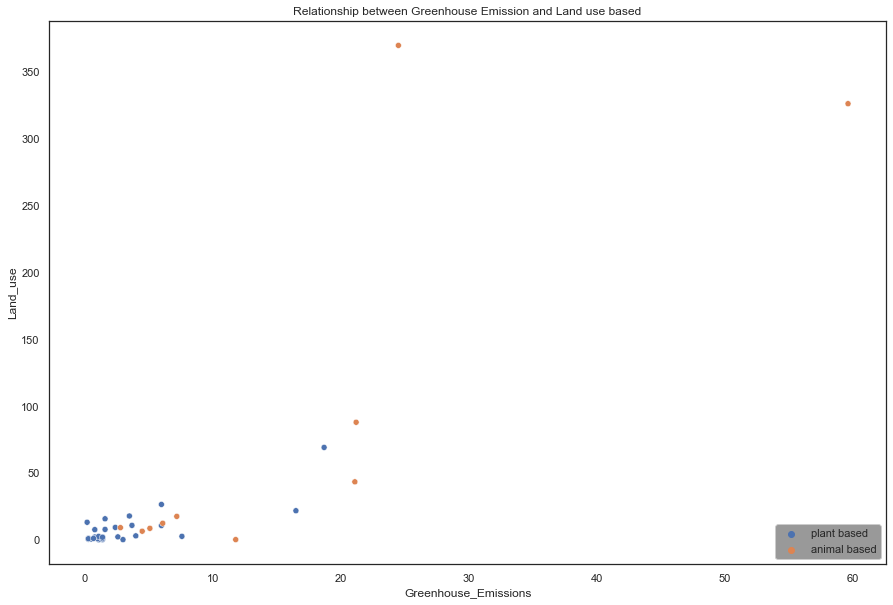

In [120]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Greenhouse_Emissions', y = 'Land_use', data = per_kilo, hue ='food category')
plt.legend(facecolor='grey', loc=4)
plt.title('Relationship between Greenhouse Emission and Land use based')
plt.show()

#### Relationship Between Eutrophying emissions relate to GreenHouse Emission
Correlation between the  Eutrophying emissions  and GreenHouse Emission is 0.75. This means a unit increase in Eutrophying emissions is associated with a 0.75 increase in greenhouse  emissions. Plant and animal based food products are represent as blue and orange respectively from the graph.

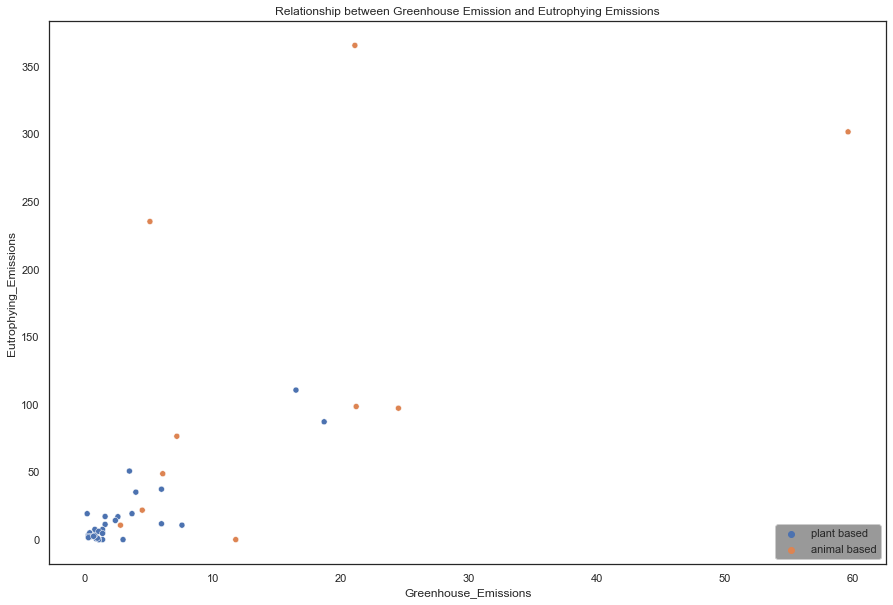

In [121]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Greenhouse_Emissions', y = 'Eutrophying_Emissions', data = per_kilo, hue ='food category')
plt.legend(facecolor='grey', loc=4)
plt.title('Relationship between Greenhouse Emission and Eutrophying Emissions')
plt.show()

#### Relationship between freshwater withdrawals and Scarcity weighted water use.
Correlation between the freshwater withdrawals  and Scarcity weighted water use. is 0.85. This means a unit increase in freshwater withdrawals  is associated with a 0.75 increase in Scarcity weighted water use Plant and animal based food products are represent as blue and orange respectively from the graph.

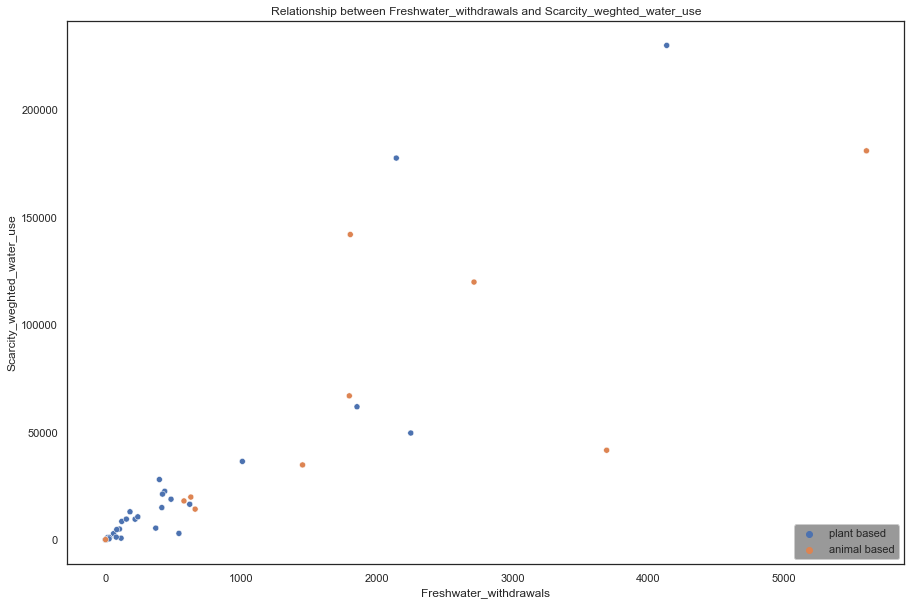

In [122]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Freshwater_withdrawals', y = 'Scarcity_weghted_water_use', data = per_kilo, hue ='food category')
plt.legend(facecolor='grey', loc=4)
plt.title('Relationship between Freshwater_withdrawals and Scarcity_weghted_water_use')
plt.show()